# Project - Netfilx Movies and TV Shows Clustering

## Project Type - Unsupervised ML

## Contributor - Sourabh Pandey

![picture](https://drive.google.com/uc?view?export=view&id=18WVwYB6kiAfpvaOjGiy_7K2cumZcXucG)

# Problem Statement

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings



# Data Understanding/ Attribute Information

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

## Steps Involved

1. Importing Libraries and Dataset
2. Data Summary
3. Data Visualization/ Exploratory Data Analysis
4. Data Preperation
5. Applying Clustering Algorithms
6. Conclusion

# 1.  Importing Libraries and Dataset

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.cm as cm

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


#for nlp
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch


import warnings
warnings.filterwarnings('ignore')

In [200]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [201]:
# Load files locally
data = pd.read_csv('/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

# 2. Data Summary

In [202]:
# Checking first few rows
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [203]:
# Checking last few rows
data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [204]:
# Checking the shape of our dataset
data.shape

(7787, 12)

In [205]:
# Checking the summary of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


### Observations

1. All our columns are categorical except the column -----> release_year

In [206]:
# Checking the columns in our dataset
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [207]:
# Checking for duplicates
data[data.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


### Observation

1. No Duplicate values in our Dataset

In [208]:
# Checking for null values in dataset
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

### Observations

1. We have Null values in the columns -----> director, cast, country, date_added, rating

### Handling Null-Values

In [209]:
data['cast'].fillna(value='No cast',inplace=True)
data['country'].fillna(value=data['country'].mode()[0],inplace=True)

In [210]:
data.dropna(subset=['date_added','rating'],inplace=True)
data.drop(['director'],axis=1,inplace=True)

In [211]:
data.isnull().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### Observations

1. All the null values have been eliminated

# 3. Data Visualization/Exploratory Data Analysis

## Analyzing Column ----> Type

In [212]:
data['type'].value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

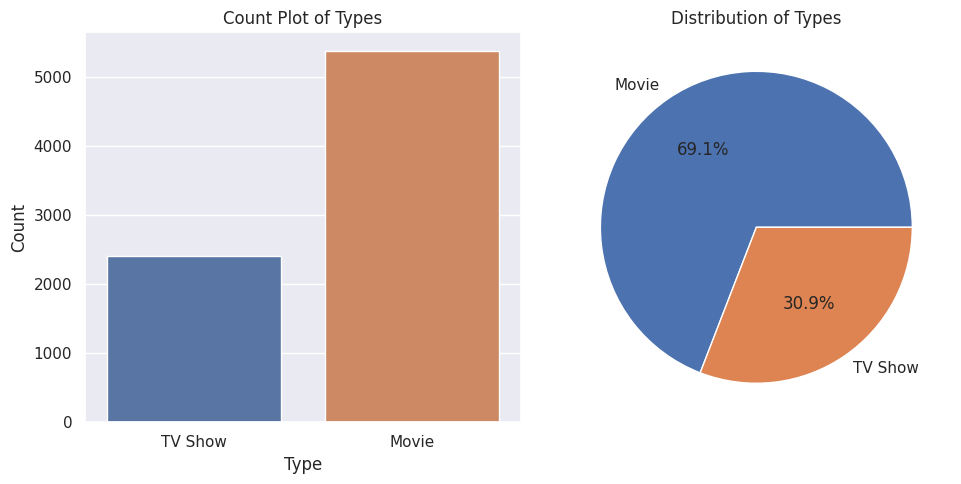

In [213]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the count plot on the first subplot
sns.countplot(x='type', data=data, ax=axes[0])
axes[0].set_xlabel('Type')
axes[0].set_ylabel('Count')
axes[0].set_title('Count Plot of Types')

# Get the value counts of the 'type' column
type_counts = data['type'].value_counts()

# Plot the pie chart on the second subplot
axes[1].pie(type_counts, labels=type_counts.index, autopct='%1.1f%%')
axes[1].set_title('Distribution of Types')

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

### Observations

## Analyzing Column ----> Title

In [214]:
# Checking for unique Values in column
data.title.nunique()

7770

In [215]:
data.shape

(7770, 11)

### Observations

1. All values present in column Title are unique.

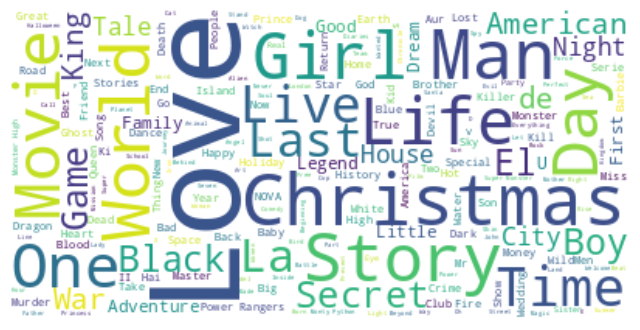

In [216]:
#subsetting data
data_wordcloud = data['title']
text = " ".join(word for word in data_wordcloud)
# Create stopword list:
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Observations

1. It seems like words like "Love", "Man", "World", "Story" , "Christmas" are very common in titles.

## Analyzing Column ----> Country

In [217]:
# Checking no. of unique values present in column Country
data.country.nunique()

681

In [218]:
# Counting individual values using value_counts()
data.country.value_counts().rename_axis('Country').reset_index(name='counts').T

,0,1,2,3,4,5,6,7,8,9,...,671,672,673,674,675,676,677,678,679,680
Country,United States,India,United Kingdom,Japan,South Korea,Canada,Spain,France,Egypt,Turkey,...,"United States, South Korea, Japan","Lebanon, United Arab Emirates, France, Switzer...","France, Australia, Germany","Ireland, United States","United States, Canada, Germany","Russia, United States, China","Italy, Switzerland, France, Germany","United States, United Kingdom, Canada","United States, United Kingdom, Japan","Sweden, Czech Republic, United Kingdom, Denmar..."
counts,3051,923,396,224,183,177,134,115,101,100,...,1,1,1,1,1,1,1,1,1,1


In [219]:
# Check no. of NaN values
data.country.isna().sum()

0

In [220]:
country_list=[]
tv_show=[]
movies=[]
for i in range(0,len(data)):
  if isinstance(data['country'].iloc[i] , str):
    split=data['country'].iloc[i].split(',')
    for k in split:
      country_list.append(k.strip())
      if data['type'].iloc[i]=='TV Show':
        tv_show.append(k.strip())
      if data['type'].iloc[i]== 'Movie':
        movies.append(k.strip())
production_country=list(set([(i,country_list.count(i),tv_show.count(i),movies.count(i)) for i in country_list]))

In [221]:
production_country[:5]

[('Malawi', 1, 0, 1),
 ('Serbia', 7, 0, 7),
 ('Israel', 26, 8, 18),
 ('', 4, 0, 4),
 ('Vatican City', 1, 0, 1)]

In [222]:
country_df= pd.DataFrame(production_country,columns=['country','Productions','TV-Shows','Movies'])
country_df=country_df.sort_values('Productions',ascending=False)
country_df=country_df.reset_index()
country_df=country_df.drop('index',axis=1)

In [223]:
#Top 5 countries
top_countries=country_df.head()
top_countries.T

,0,1,2,3,4
country,United States,India,United Kingdom,Canada,France
Productions,3793,990,722,412,349
TV-Shows,1136,75,255,126,84
Movies,2657,915,467,286,265


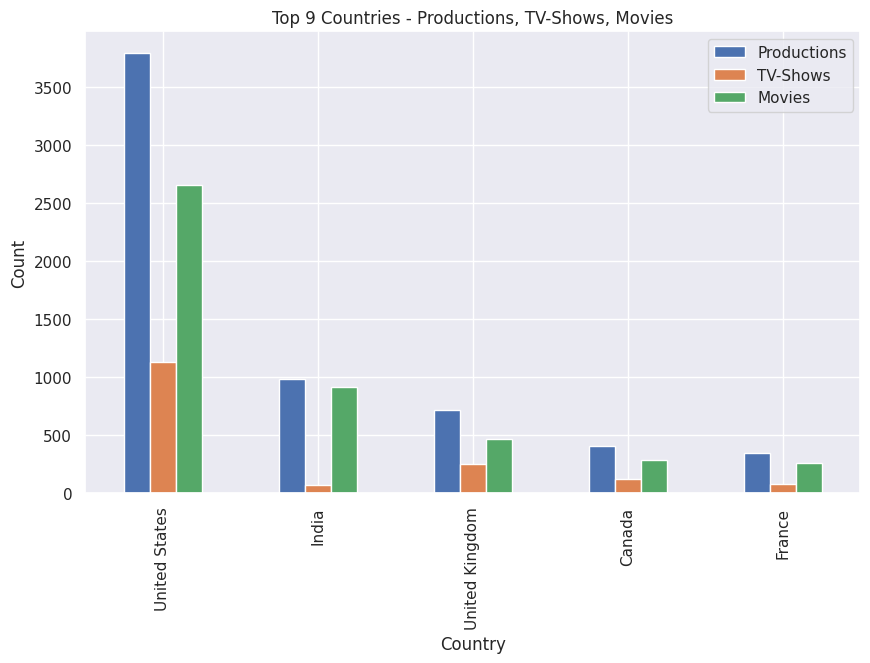

In [224]:
# Set the desired figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bar chart
top_countries.head(9).plot(x="country", y=['Productions', 'TV-Shows', 'Movies'], kind="bar", ax=ax)

# Customize the plot (add labels, title, etc.)
ax.set_xlabel("Country")
ax.set_ylabel("Count")
ax.set_title("Top 9 Countries - Productions, TV-Shows, Movies")

# Show the plot
plt.show()

## Analyzing Columns ----> Duration

In [225]:
# Checking Data types
type(data.duration.iloc[0][0])

str

### Checking Unique values present in duration column

In [226]:
data.duration.nunique()

216

### Checking count of each unique values

In [227]:
data.duration.value_counts().to_frame().T

,1 Season,2 Seasons,3 Seasons,90 min,93 min,91 min,94 min,95 min,92 min,97 min,...,13 min,214 min,13 Seasons,9 min,312 min,182 min,224 min,37 min,233 min,191 min
duration,1606,378,183,136,131,125,125,119,118,117,...,1,1,1,1,1,1,1,1,1,1


### Converting Season to Minutes

In [228]:
def convert_seasons_to_min(value):
  """
  This function will calculate no of total mins as per season no.
  Here our assumptions are
    1. on average 5 episodes are there in a season.
    2. each episode avg time is 55 mins.
  """
  no_of_avg_episode = 5
  if "Seasons" in value:
    #containing more than 1 seasons
    value = value.replace("Seasons",'')
    value = value.replace(" ","")
    total_seasons = int(value)
    each_season_mins = ( no_of_avg_episode * 55 )
    total_mins = (total_seasons * each_season_mins)
    return total_mins

  elif "Season" in value:
    # containing only 1 season
    value = value.replace("Season",'')
    value = value.replace(" ","")
    total_mins = (no_of_avg_episode * 55)
    return total_mins

In [229]:
#Checking the function
convert_seasons_to_min("4 Seasons")

1100

**"4 Seasons"** : <br>
4 Seasons = (4*5) or 20 episodes<br>
Each episode avg. time is 55 mins.<br>
Total time (in minutes. ) = (55*20) min<br> = 1100 mins
                         

### Converting all duration into minutes

In [230]:
def all_the_duration_in_minutes():
  """
  This function will convert all the duration
  whether it's in minutes or season format to minute
  """
  # replaced all the min with null string
  data['duration'] = data.duration.str.replace(" min" , "")
  # this time_list will contain all the value
  time_list =[]
  for time in data.duration.values:
    if "Season" in time:
      #time is containing Season
      # calling convert_seasons_to_min function to convert
      # season to total min
      time = convert_seasons_to_min(time)
    else:
      #replacing single space with ""
      time = time.replace(" ","")
    #appending time (it's not containing words like min or seasons)
    time_list.append(time)

  #converting all the time into integer format
  time_list = [ int(Time) for Time in time_list]

  #Assigning time_list to df.duration
  data.duration = time_list

In [231]:
data.duration.value_counts().to_frame().T

,1 Season,2 Seasons,3 Seasons,90 min,93 min,91 min,94 min,95 min,92 min,97 min,...,13 min,214 min,13 Seasons,9 min,312 min,182 min,224 min,37 min,233 min,191 min
duration,1606,378,183,136,131,125,125,119,118,117,...,1,1,1,1,1,1,1,1,1,1


In [232]:
all_the_duration_in_minutes()

In [233]:
data.duration.value_counts().to_frame().T

,275,550,825,90,93,91,94,95,92,97,...,13,214,3575,9,312,182,224,37,233,191
duration,1606,378,183,136,131,125,125,119,118,117,...,1,1,1,1,1,1,1,1,1,1


## Analysis on Duration of Movies

<Axes: xlabel='duration', ylabel='Density'>

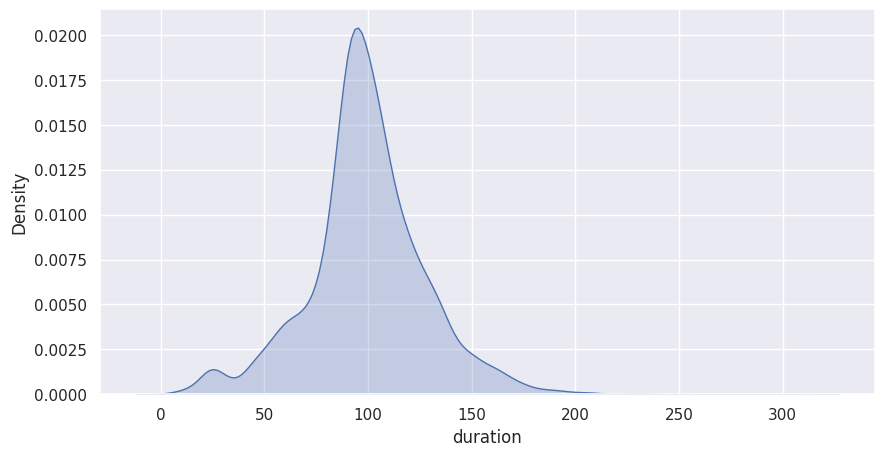

In [234]:
sns.set(style="darkgrid")
plt.figure(figsize = (10,5))
sns.kdeplot(data = data.duration[data['type'] == 'Movie'] , shade=True)

### Observations

1. Movies mostly have a duration between 50-150 minutes

## Analysis on Duration of TV Shows

<Axes: xlabel='duration', ylabel='Density'>

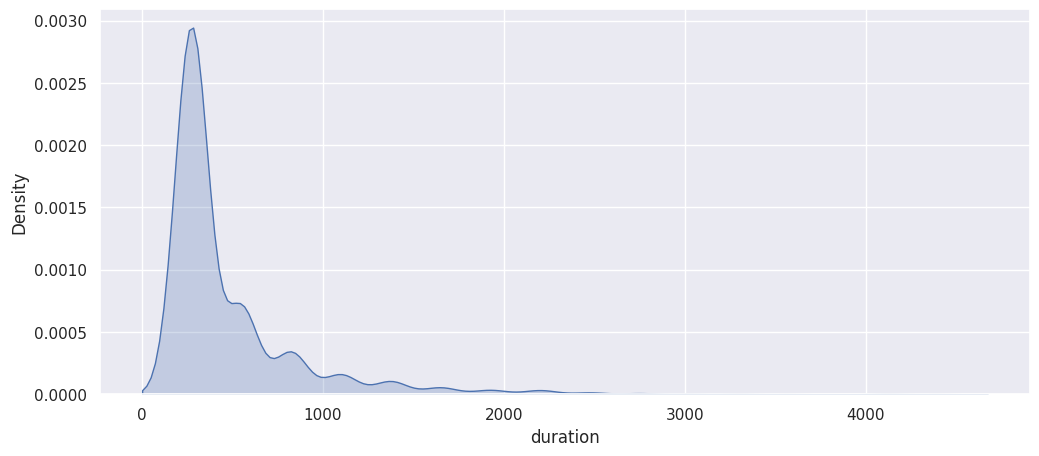

In [235]:
sns.set(style="darkgrid")
plt.figure(figsize = (12,5))
sns.kdeplot(data = data.duration[data['type'] == 'TV Show'] , shade=True)

### Observations

1. Most TV shows have a duration of 200-500 minutes.

## Analyzing Column ----> listed_in

### Unique Value in the column

In [236]:
data.listed_in.nunique()

491

### Observations

There are 491 values present.

### NaN values present in listed_in

In [237]:
data.listed_in.isna().sum()

0

### Observations

There are no NaN Values

### Let's see the value counts

In [238]:
data.listed_in.value_counts().to_frame().T

,Documentaries,Stand-Up Comedy,"Dramas, International Movies","Comedies, Dramas, International Movies","Dramas, Independent Movies, International Movies",Kids' TV,Children & Family Movies,"Documentaries, International Movies","Children & Family Movies, Comedies","Comedies, International Movies",...,"TV Horror, TV Mysteries, Teen TV Shows","Action & Adventure, International Movies, Thrillers","Anime Series, TV Horror, TV Thrillers","Action & Adventure, Faith & Spirituality, Sci-Fi & Fantasy","TV Dramas, TV Sci-Fi & Fantasy, Teen TV Shows","Anime Series, Crime TV Shows, TV Thrillers","Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows","Crime TV Shows, International TV Shows, Reality TV","International Movies, Romantic Movies, Sci-Fi & Fantasy","International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows"
listed_in,334,321,320,243,215,204,177,172,169,161,...,1,1,1,1,1,1,1,1,1,1


### Making Categories

In [239]:
categories = ", ".join(data['listed_in']).split(", ")
categories[:5]

['International TV Shows',
 'TV Dramas',
 'TV Sci-Fi & Fantasy',
 'Dramas',
 'International Movies']

In [240]:
len(categories)

17042

In [241]:
len(set(categories))

42

### Observation

There are 42 unique categories present & in this dataset all the categories occured in total 17051 times

Creating a dictionary ( category_wise_count ) where for each category there will be a value which basically tells us how many times that particular category occured

In [242]:
category_wise_count = {}
for category in set(categories):
  category_wise_count[category] = categories.count(category)

In [243]:
category_wise_count

{'Action & Adventure': 721,
 'Children & Family Movies': 532,
 'Stand-Up Comedy': 329,
 'Reality TV': 222,
 'TV Mysteries': 90,
 'TV Thrillers': 50,
 'Independent Movies': 673,
 'TV Action & Adventure': 149,
 'Crime TV Shows': 426,
 'International Movies': 2437,
 'Romantic TV Shows': 333,
 'Music & Musicals': 321,
 'Teen TV Shows': 60,
 'Sports Movies': 196,
 'Classic Movies': 103,
 'LGBTQ Movies': 90,
 'TV Dramas': 703,
 'Classic & Cult TV': 25,
 'Documentaries': 786,
 'Dramas': 2105,
 'Thrillers': 491,
 'TV Sci-Fi & Fantasy': 75,
 'Comedies': 1471,
 'Romantic Movies': 531,
 "Kids' TV": 411,
 'Sci-Fi & Fantasy': 218,
 'Anime Series': 146,
 'British TV Shows': 231,
 'TV Shows': 12,
 'Anime Features': 57,
 'TV Comedies': 517,
 'Science & Nature TV': 85,
 'Korean TV Shows': 150,
 'International TV Shows': 1197,
 'Docuseries': 352,
 'Spanish-Language TV Shows': 146,
 'Cult Movies': 59,
 'Movies': 52,
 'Horror Movies': 312,
 'TV Horror': 69,
 'Stand-Up Comedy & Talk Shows': 52,
 'Faith & S

### Sorting category_wise_count by value

In [244]:
sorted_category_wise_count = sorted(category_wise_count.items(), key=lambda x: x[1])
sorted_category_wise_count[:4]

[('TV Shows', 12),
 ('Classic & Cult TV', 25),
 ('TV Thrillers', 50),
 ('Movies', 52)]

In [245]:
# Top 5 least occurred in category
sorted_category_wise_count[:5]

[('TV Shows', 12),
 ('Classic & Cult TV', 25),
 ('TV Thrillers', 50),
 ('Movies', 52),
 ('Stand-Up Comedy & Talk Shows', 52)]

In [246]:
# Top 5 most occurred category
sorted_category_wise_count[-5:]

[('Documentaries', 786),
 ('International TV Shows', 1197),
 ('Comedies', 1471),
 ('Dramas', 2105),
 ('International Movies', 2437)]

In [247]:
# Top 10 most occurred categories
top_10_most_occurred_categories = sorted_category_wise_count[-10:]

In [248]:
top_10_most_occurred_categories

[('Romantic Movies', 531),
 ('Children & Family Movies', 532),
 ('Independent Movies', 673),
 ('TV Dramas', 703),
 ('Action & Adventure', 721),
 ('Documentaries', 786),
 ('International TV Shows', 1197),
 ('Comedies', 1471),
 ('Dramas', 2105),
 ('International Movies', 2437)]

In [249]:
top_10_most_occurred_category_name = []
top_10_most_occurred_category_count = []
for tup in top_10_most_occurred_categories:
  top_10_most_occurred_category_name.append(tup[0])
  top_10_most_occurred_category_count.append(tup[1])

In [250]:
top_10_most_occurred_category_name

['Romantic Movies',
 'Children & Family Movies',
 'Independent Movies',
 'TV Dramas',
 'Action & Adventure',
 'Documentaries',
 'International TV Shows',
 'Comedies',
 'Dramas',
 'International Movies']

In [251]:
top_10_most_occurred_category_count

[531, 532, 673, 703, 721, 786, 1197, 1471, 2105, 2437]

### Plotting top 10 most occcured category count

<Figure size 1600x800 with 0 Axes>

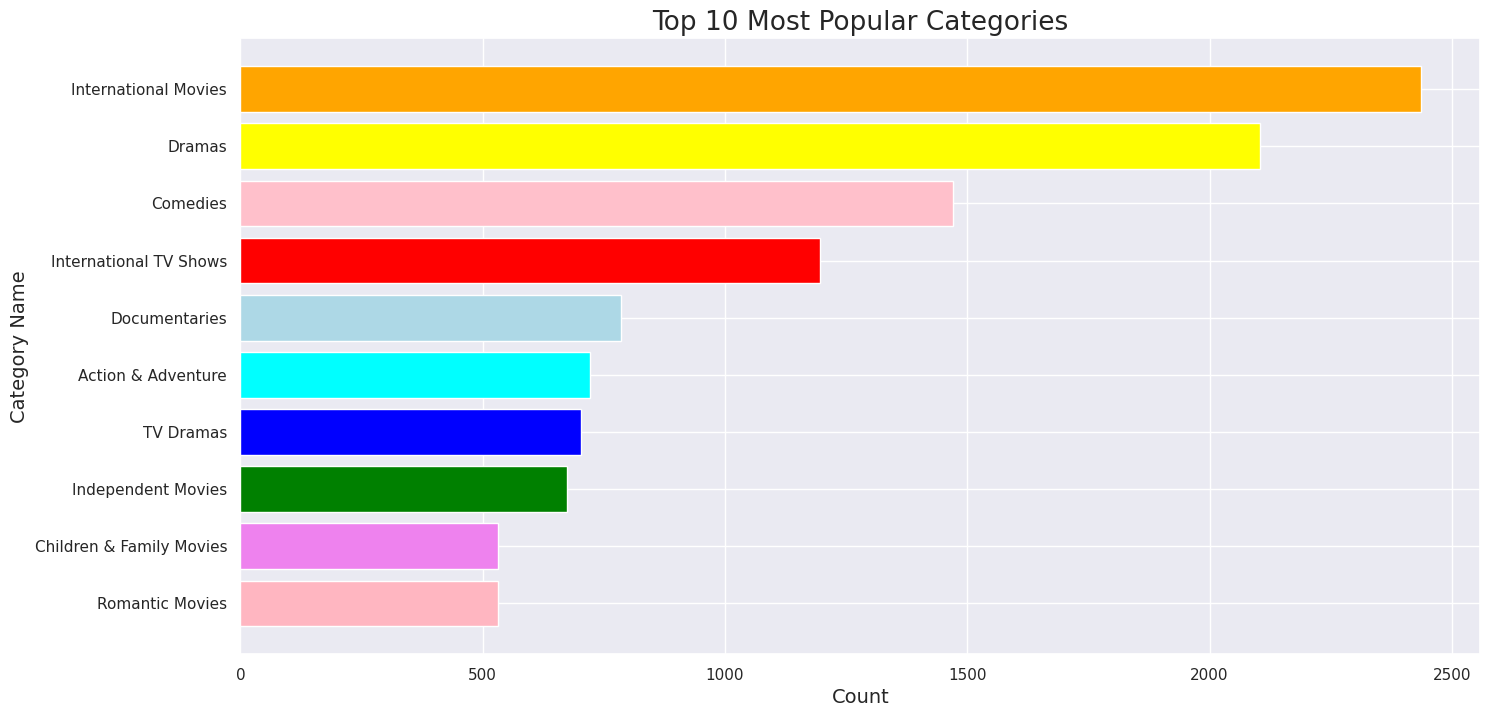

<Figure size 1600x800 with 0 Axes>

In [252]:
plt.figure( figsize = (16,8))
color=['lightpink', 'violet', 'green', 'blue', 'cyan' , "lightblue" ,'red', 'pink', 'yellow', 'orange']
plt.barh(top_10_most_occurred_category_name , top_10_most_occurred_category_count ,
        color= color)
plt.title("Top 10 Most Popular Categories",fontsize = 19)
plt.xlabel("Count", fontsize = 14 )
plt.ylabel("Category Name" , fontsize = 14 )
plt.figure( figsize = (16,8))

### Creating column no_of_category

In [253]:
# Let's check the data types
type(data.listed_in.iloc[0])

str

In [254]:
(data.listed_in.iloc[0])

'International TV Shows, TV Dramas, TV Sci-Fi & Fantasy'

In [255]:
(data.listed_in.iloc[0]).split(",")

['International TV Shows', ' TV Dramas', ' TV Sci-Fi & Fantasy']

In [256]:
len((data.listed_in.iloc[0]).split(","))

3

In [257]:
no_of_category = []
for categories in data.listed_in.values:
  len_categories = len(categories.split(","))
  no_of_category.append(len_categories)

In [258]:
data['no_of_category'] = no_of_category

In [259]:
data[['listed_in' , 'no_of_category']].head()

,listed_in,no_of_category
0,"International TV Shows, TV Dramas, TV Sci-Fi &...",3
1,"Dramas, International Movies",2
2,"Horror Movies, International Movies",2
3,"Action & Adventure, Independent Movies, Sci-Fi...",3
4,Dramas,1


### Histogram of no_of_category using listed_in

In [260]:
data.no_of_category.unique()

array([3, 2, 1])

In [261]:
data.no_of_category.value_counts()

3    3295
2    2682
1    1793
Name: no_of_category, dtype: int64

Text(0, 0.5, 'Count')

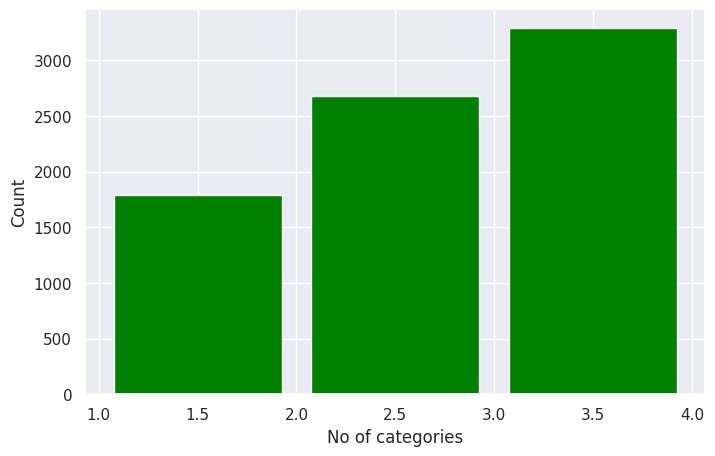

In [262]:
sns.set(style="darkgrid")
plt.figure(figsize = (8,5))
plt.hist(data.no_of_category , bins=[1,2,3,4] , range = (1 ,4) , rwidth = 0.85, color ='green')
plt.xlabel("No of categories")
plt.ylabel("Count")

## Analyzing column ----> date_added

In [263]:
data.date_added.head(5)

0      August 14, 2020
1    December 23, 2016
2    December 20, 2018
3    November 16, 2017
4      January 1, 2020
Name: date_added, dtype: object

### Let's create a column for month

In [264]:
data['date_added_month'] = data['date_added'].apply(lambda x: x.split(" ")[0])
data[['date_added' , 'date_added_month']].head()

,date_added,date_added_month
0,"August 14, 2020",August
1,"December 23, 2016",December
2,"December 20, 2018",December
3,"November 16, 2017",November
4,"January 1, 2020",January


In [265]:
month_df=data['date_added_month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name'}, inplace=True)
month_df.rename(columns={'month': 'Count'}, inplace=True)
new_month_df = month_df.loc[0:11]
new_month_df

,Month_Name,date_added_month
0,December,816
1,October,780
2,January,745
3,November,730
4,March,660
5,September,613
6,August,611
7,April,595
8,July,592
9,June,538


In [266]:
month_names = new_month_df.Month_Name.values
month_wise_count = new_month_df.date_added_month.values

Text(0, 0.5, 'Count')

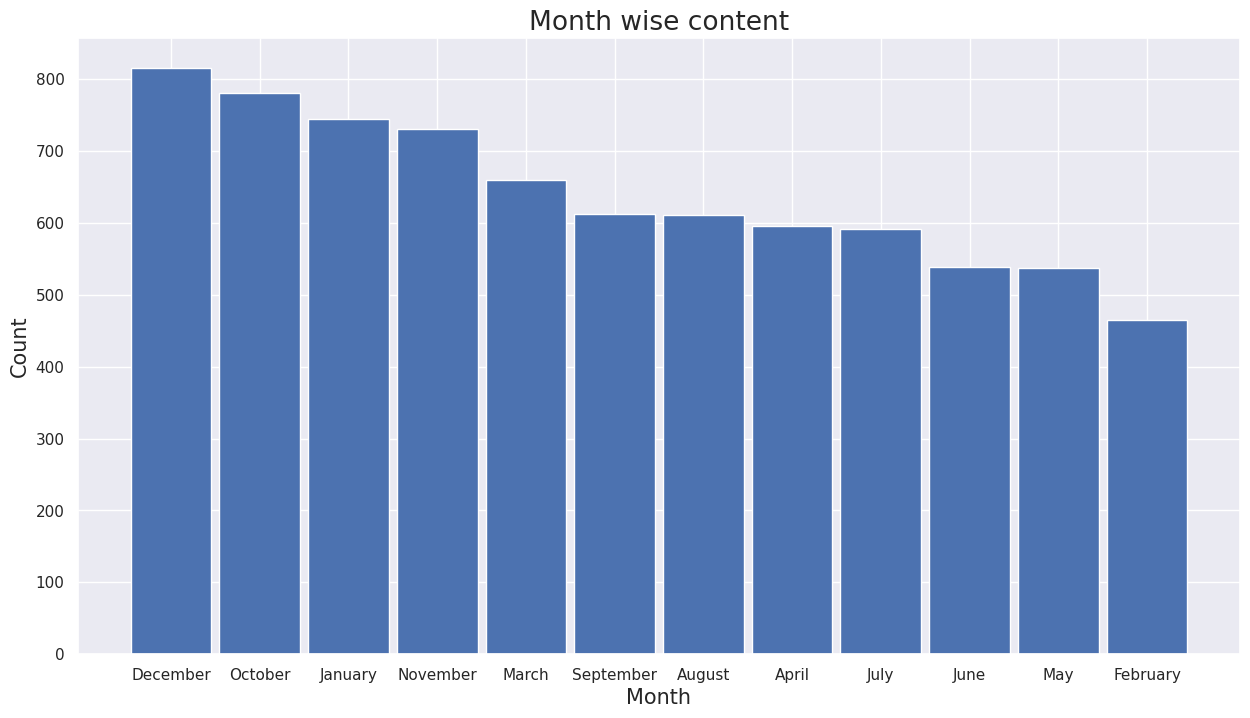

In [267]:
plt.figure(figsize = (15,8 ))
plt.bar(month_names , month_wise_count, width = 0.91)
plt.title("Month wise content" , fontsize = 19)
plt.xlabel("Month" , fontsize = 15)
plt.ylabel("Count" , fontsize = 15)

### Observations

1. We know that December is the holiday season with Christmas, so in this month most of the content got uploaded.

In [268]:
data.date_added_month.value_counts().to_frame()

,date_added_month
December,816
October,780
January,745
November,730
March,660
September,613
August,611
April,595
July,592
June,538


## Analyzing column ----> show_id

In [269]:
data.columns

Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'no_of_category', 'date_added_month'],
      dtype='object')

### Checking NaN values

In [270]:
data.show_id.isna().sum()

0

### Observations

No NaN Values present

### Checking value counts

In [271]:
data.show_id.value_counts()

s1       1
s5177    1
s5205    1
s5204    1
s5203    1
        ..
s2593    1
s2592    1
s2591    1
s2590    1
s7787    1
Name: show_id, Length: 7770, dtype: int64

In [272]:
data.shape[0]

7770

### Observations

Each value in the column show_id is unique

In [273]:
# Checking the data types
type(data.show_id.iloc[0])

str

In [274]:
data.rating.value_counts()

TV-MA       2861
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

### Let's see most popular TV shows ratings

In [275]:
data['type'].unique()

array(['TV Show', 'Movie'], dtype=object)

In [276]:
data_tv_show = data[data['type']== 'TV Show' ]
data_tv_show.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,1100,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,3,August
5,s6,TV Show,46,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,275,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,3,July
11,s12,TV Show,1983,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,275,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",3,November
12,s13,TV Show,1994,No cast,Mexico,"May 17, 2019",2019,TV-MA,275,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,3,May
16,s17,TV Show,Feb-09,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",United States,"March 20, 2019",2018,TV-14,275,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",2,March


### Pointplot on top tv show ratings

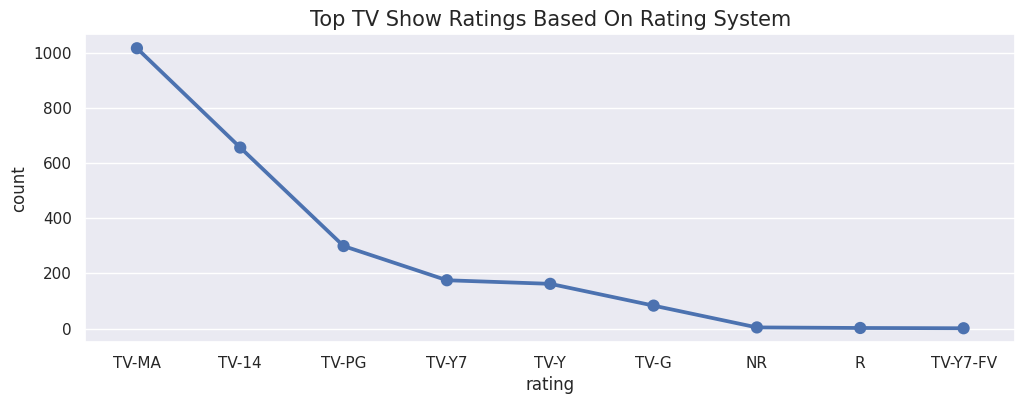

In [277]:
tv_ratings = data_tv_show.groupby(['rating'])['show_id'].count().reset_index(name = 'count').sort_values(by = 'count', ascending = False)
fig_dims = (12,4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('Top TV Show Ratings Based On Rating System',size='15')
plt.show()

### Let's see most popular movies rating

In [278]:
data_movies = data[data['type'] == 'Movie' ]
data_movies.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2,December
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2,December
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",3,November
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,1,January
6,s7,Movie,122,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2,June


### Pointplot on top TV show ratings

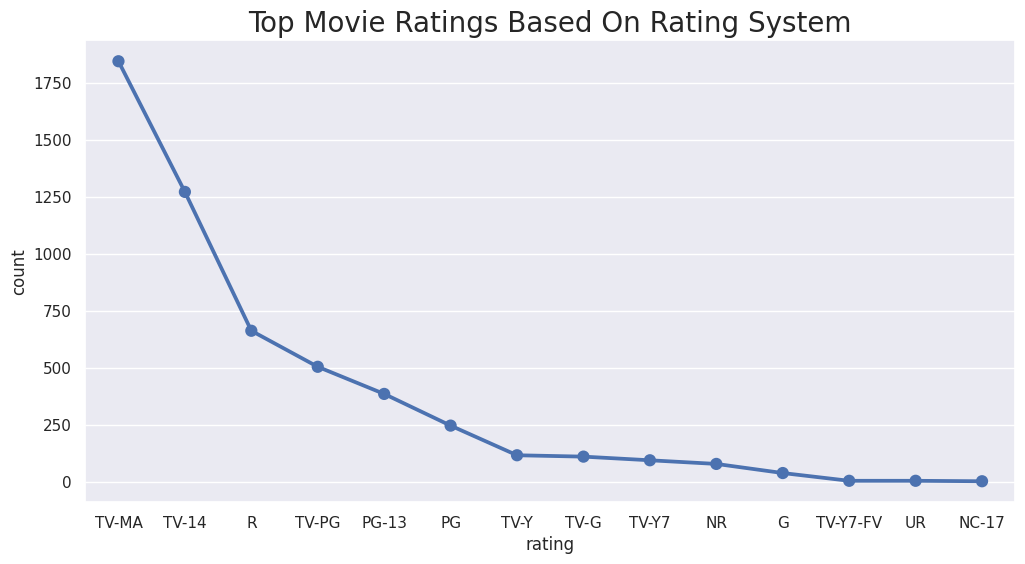

In [279]:
tv_ratings = data_movies.groupby(['rating'])['show_id'].count().reset_index(name = 'count').sort_values(by = 'count', ascending = False)
fig_dims = (12,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('Top Movie Ratings Based On Rating System',size='20')
plt.show()

### Observations

TV-MA (For Mature Audiences)

TV-14 ( May be unsuitable for children under 14 )

TV-PG ( Parental Guidance Suggested )

NR ( Not Rated )

# 4. Data Prepration (NLP Data Prepration)

In [280]:
data.columns

Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'no_of_category', 'date_added_month'],
      dtype='object')

In [281]:
data.description.iloc[0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

In [282]:
First_des = data.description.iloc[0]
First_des

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

### Importing Libraries

In [283]:
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [284]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] bcp47............... BCP-47 Language Tags
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)


True

### Removing punctuations

In [285]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space,
    # which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [286]:
data['description'] = data['description'].apply(remove_punctuation)
data.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,1100,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,3,August
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2,December
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies",When an army recruit is found dead his fellow ...,2,December
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...",In a postapocalyptic world ragdoll robots hide...,3,November
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123,Dramas,A brilliant group of students become cardcount...,1,January


### Removing Stopwords

In [287]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [288]:
# extracting the stopwords from nltk library
sw = nltk.corpus.stopwords.words('english')
# displaying the stopwords
for i in sw:
  print(i , end=',  ')

i,  me,  my,  myself,  we,  our,  ours,  ourselves,  you,  you're,  you've,  you'll,  you'd,  your,  yours,  yourself,  yourselves,  he,  him,  his,  himself,  she,  she's,  her,  hers,  herself,  it,  it's,  its,  itself,  they,  them,  their,  theirs,  themselves,  what,  which,  who,  whom,  this,  that,  that'll,  these,  those,  am,  is,  are,  was,  were,  be,  been,  being,  have,  has,  had,  having,  do,  does,  did,  doing,  a,  an,  the,  and,  but,  if,  or,  because,  as,  until,  while,  of,  at,  by,  for,  with,  about,  against,  between,  into,  through,  during,  before,  after,  above,  below,  to,  from,  up,  down,  in,  out,  on,  off,  over,  under,  again,  further,  then,  once,  here,  there,  when,  where,  why,  how,  all,  any,  both,  each,  few,  more,  most,  other,  some,  such,  no,  nor,  not,  only,  own,  same,  so,  than,  too,  very,  s,  t,  can,  will,  just,  don,  don't,  should,  should've,  now,  d,  ll,  m,  o,  re,  ve,  y,  ain,  aren,  

In [289]:
print("Number of stopwords in english : ", len(sw))

Number of stopwords in english :  179


In [290]:
def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    #Method 1
    text1 = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text1)

In [291]:
data['description'] = data['description'].apply( remove_stopwords )
data.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,1100,"International TV Shows, TV Dramas, TV Sci-Fi &...",future elite inhabit island paradise far crowd...,3,August
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",devastating earthquake hits mexico city trappe...,2,December
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies",army recruit found dead fellow soldiers forced...,2,December
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalyptic world ragdoll robots hide fear...,3,November
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123,Dramas,brilliant group students become cardcounting e...,1,January


### Observations

We can see that all the values in description column are free of puctuation and stopwords.

### Counting Vocabulary items

In [292]:
# Create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(data['description'])
# Collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [293]:
dictionary

dict_items([('future', 7149), ('elite', 5638), ('inhabit', 8940), ('island', 9216), ('paradise', 12662), ('far', 6394), ('crowded', 4228), ('slums', 16080), ('get', 7345), ('one', 12291), ('chance', 3059), ('join', 9434), ('saved', 15184), ('squalor', 16495), ('devastating', 4822), ('earthquake', 5487), ('hits', 8301), ('mexico', 11093), ('city', 3325), ('trapped', 17897), ('survivors', 17043), ('walks', 18855), ('life', 10163), ('wait', 18832), ('rescued', 14501), ('trying', 18039), ('desperately', 4775), ('stay', 16604), ('alive', 781), ('army', 1222), ('recruit', 14221), ('found', 6933), ('dead', 4489), ('fellow', 6520), ('soldiers', 16205), ('forced', 6869), ('confront', 3778), ('terrifying', 17419), ('secret', 15372), ('thats', 17473), ('haunting', 8006), ('jungle', 9529), ('training', 17854), ('camp', 2750), ('postapocalyptic', 13341), ('world', 19292), ('ragdoll', 13940), ('robots', 14827), ('hide', 8181), ('fear', 6473), ('dangerous', 4416), ('machines', 10520), ('exterminate',

In [294]:
vocab = [ ]
count_of_vocab = []
for key , value in dictionary:
  vocab.append( key )
  count_of_vocab.append( value )

### New data frame vocab_before_stemming

In [296]:
# Store the count in panadas dataframe with vocab as index
vocab_before_stemming = pd.DataFrame({"Word": vocab ,
                                      "count" :count_of_vocab})
# Sort the dataframe
vocab_before_stemming = vocab_before_stemming.sort_values("count" ,ascending=False)

In [297]:
vocab_before_stemming.head()

,Word,count
18845,şeref,19585
10379,ōarai,19584
12367,łukasz,19583
11090,überelite,19582
11662,über,19581


In [298]:
vocab_before_stemming.head(20).T

,18845,10379,12367,11090,11662,13273,6576,18183,10417,9859,19547,6528,19582,16402,7184,18385,19572,19579,10282,18059
Word,şeref,ōarai,łukasz,überelite,über,ömer,émile,ángel,álvaro,álex,zé,zurich,zumbo,zulu,zuhu,zuckerberg,zoé,zozo,zoya,zorro
count,19585,19584,19583,19582,19581,19580,19579,19578,19577,19576,19575,19574,19573,19572,19571,19570,19569,19568,19567,19566


In [299]:
vocab_before_stemming.tail()

,Word,count
8311,1000,4
639,100,3
7608,10,2
7954,009,1
6859,007,0


## Top 15 most common words

In [300]:
top15_most_ocurred_vacab = vocab_before_stemming.head(15)

In [301]:
top15_most_occurred_words = top15_most_ocurred_vacab.Word.values
top15_most_occurred_words

array(['şeref', 'ōarai', 'łukasz', 'überelite', 'über', 'ömer', 'émile',
       'ángel', 'álvaro', 'álex', 'zé', 'zurich', 'zumbo', 'zulu', 'zuhu'],
      dtype=object)

In [302]:
top15_most_occurred_words_count = top15_most_ocurred_vacab['count'].values
top15_most_occurred_words_count

array([19585, 19584, 19583, 19582, 19581, 19580, 19579, 19578, 19577,
       19576, 19575, 19574, 19573, 19572, 19571])

<BarContainer object of 15 artists>

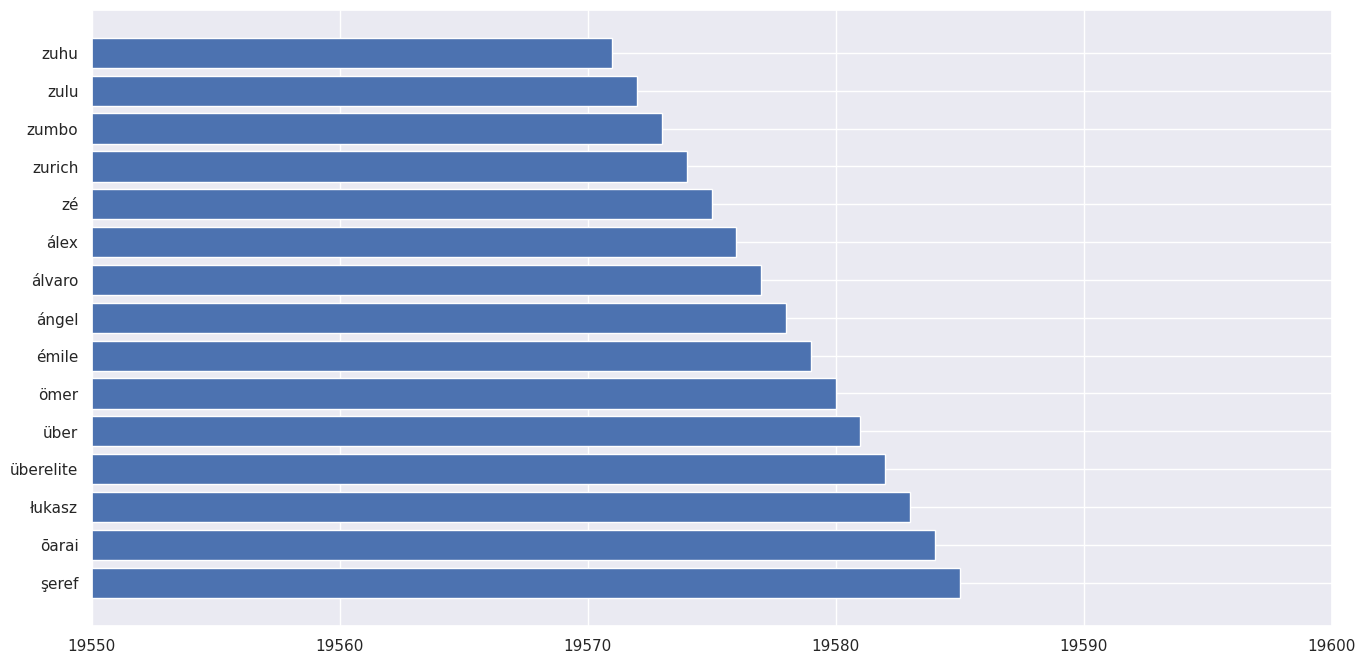

In [303]:
plt.figure( figsize = ( 16,8 ))
plt.xlim(19550, 19600)
plt.barh(top15_most_occurred_words , top15_most_occurred_words_count )

In [304]:
# Create an object of stemming function
stemmer = SnowballStemmer("english")

In [305]:
def Apply_stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [306]:
#Stemming for description
data['description'] = data['description'].apply( Apply_stemming )
data.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,1100,"International TV Shows, TV Dramas, TV Sci-Fi &...",futur elit inhabit island paradis far crowd sl...,3,August
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",devast earthquak hit mexico citi trap survivor...,2,December
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies",armi recruit found dead fellow soldier forc co...,2,December
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalypt world ragdol robot hide fear dan...,3,November
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123,Dramas,brilliant group student becom cardcount expert...,1,January


### Using TfidfVectorizer

In [307]:
# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# Fit the vectorizer using the text data
tfid_vectorizer.fit(data['description'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [308]:
# Lists to store the vocab and counts
vocab = []
count_of_vocab = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count_of_vocab.append(value)

### Creating a new DataFrame ----> vocab_after_stemming

In [309]:
# Store the count in panadas dataframe with vocab as index
vocab_after_stemming = pd.DataFrame({"Word": vocab ,
                                      "count" :count_of_vocab})
# Sort the dataframe
vocab_after_stemming = vocab_after_stemming.sort_values("count" ,ascending=False)

In [310]:
top15_most_ocurred_vocab = vocab_after_stemming.head(15)

In [311]:
top15_most_occurred_words = top15_most_ocurred_vocab.Word.values
top15_most_occurred_words

array(['şeref', 'ōarai', 'łukasz', 'überelit', 'über', 'ömer', 'émile',
       'ángel', 'álvaro', 'álex', 'zé', 'zurich', 'zumbo', 'zulu', 'zuhu'],
      dtype=object)

In [312]:
top15_most_occurred_words_count = top15_most_ocurred_vocab['count'].values
top15_most_occurred_words_count

array([14233, 14232, 14231, 14230, 14229, 14228, 14227, 14226, 14225,
       14224, 14223, 14222, 14221, 14220, 14219])

<BarContainer object of 15 artists>

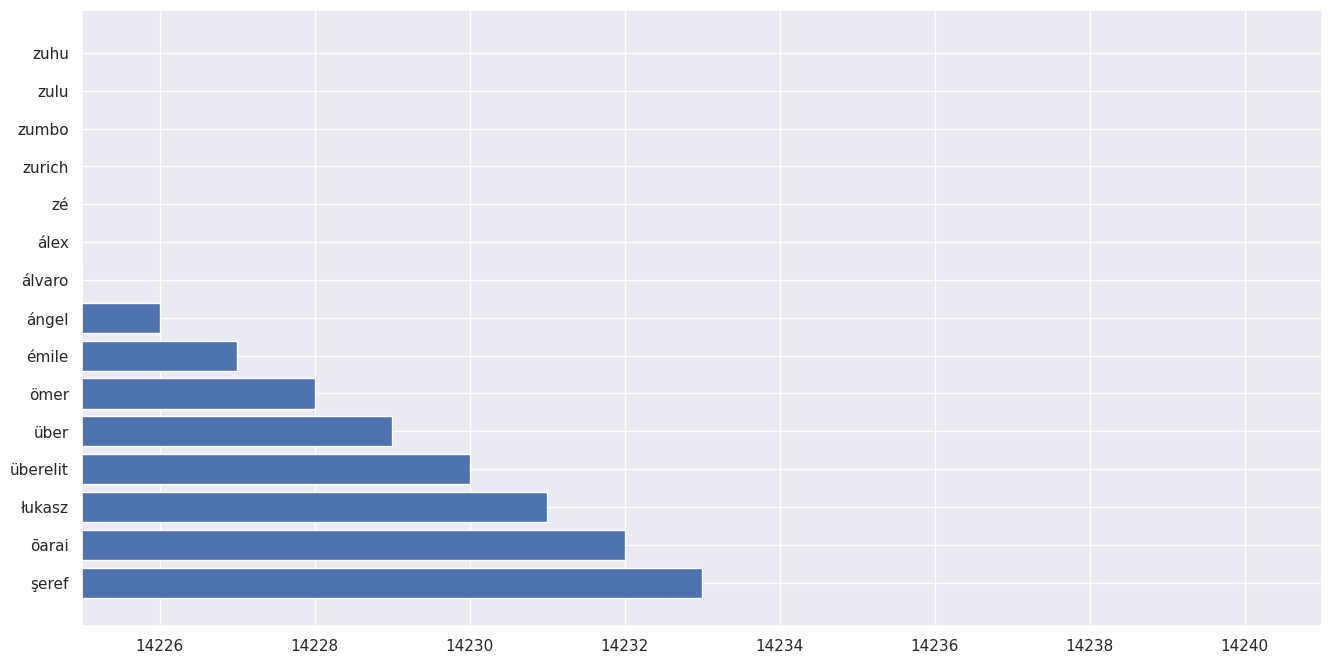

In [313]:
plt.figure( figsize = ( 16,8 ))
plt.xlim(14225, 14241)
plt.barh(top15_most_occurred_words , top15_most_occurred_words_count )

### Adding a new column length which will contain length of description.

In [314]:
data['Length(description)'] = data['description'].apply(lambda x: len(x))

In [316]:
data.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month,Length(description)
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,1100,"International TV Shows, TV Dramas, TV Sci-Fi &...",futur elit inhabit island paradis far crowd sl...,3,August,82
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",devast earthquak hit mexico citi trap survivor...,2,December,88
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies",armi recruit found dead fellow soldier forc co...,2,December,102
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalypt world ragdol robot hide fear dan...,3,November,89
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123,Dramas,brilliant group student becom cardcount expert...,1,January,99


In [317]:
data.description.iloc[0]

'futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalor'

In [318]:
len(data.description.iloc[0])

82

## listed_in

### Removing Punctuations

In [319]:
data.columns

Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'no_of_category', 'date_added_month', 'Length(description)'],
      dtype='object')

In [320]:
data['listed_in'] = data['listed_in'].apply(remove_punctuation)
data.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month,Length(description)
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,1100,International TV Shows TV Dramas TV SciFi Fan...,futur elit inhabit island paradis far crowd sl...,3,August,82
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93,Dramas International Movies,devast earthquak hit mexico citi trap survivor...,2,December,88
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78,Horror Movies International Movies,armi recruit found dead fellow soldier forc co...,2,December,102
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80,Action Adventure Independent Movies SciFi Fa...,postapocalypt world ragdol robot hide fear dan...,3,November,89
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123,Dramas,brilliant group student becom cardcount expert...,1,January,99


### Removing StopWords

In [322]:
#Remove stopwords for listed_in
data['listed_in'] = data['listed_in'].apply( remove_stopwords )
data.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month,Length(description)
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,1100,international tv shows tv dramas tv scifi fantasy,futur elit inhabit island paradis far crowd sl...,3,August,82
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93,dramas international movies,devast earthquak hit mexico citi trap survivor...,2,December,88
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78,horror movies international movies,armi recruit found dead fellow soldier forc co...,2,December,102
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80,action adventure independent movies scifi fantasy,postapocalypt world ragdol robot hide fear dan...,3,November,89
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123,dramas,brilliant group student becom cardcount expert...,1,January,99


### Using CountVectorizer() to count vocabulary items

In [323]:
# Create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(data['listed_in'])
# Collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [324]:
dictionary

dict_items([('international', 19), ('tv', 41), ('shows', 33), ('dramas', 12), ('scifi', 31), ('fantasy', 15), ('movies', 23), ('horror', 17), ('action', 0), ('adventure', 1), ('independent', 18), ('mysteries', 26), ('thrillers', 40), ('crime', 8), ('docuseries', 11), ('documentaries', 10), ('sports', 36), ('comedies', 6), ('anime', 2), ('series', 32), ('reality', 28), ('romantic', 29), ('science', 30), ('nature', 27), ('british', 3), ('korean', 21), ('music', 24), ('musicals', 25), ('lgbtq', 22), ('faith', 13), ('spirituality', 35), ('kids', 20), ('spanishlanguage', 34), ('children', 4), ('family', 14), ('classic', 5), ('cult', 9), ('standup', 37), ('comedy', 7), ('talk', 38), ('teen', 39), ('features', 16)])

In [325]:
vocab = [ ]
count_of_vocab = []
for key , value in dictionary:
  vocab.append( key )
  count_of_vocab.append( value )

In [326]:
listed_in_vocab_before_stem = pd.DataFrame({"Word": vocab , "count" :count_of_vocab})

listed_in_vocab_before_stem = listed_in_vocab_before_stem.sort_values("count" ,ascending=False)

In [327]:
listed_in_vocab_before_stem.head()

,Word,count
1,tv,41
12,thrillers,40
40,teen,39
39,talk,38
37,standup,37


In [328]:
listed_in_vocab_before_stem.tail()

,Word,count
33,children,4
24,british,3
18,anime,2
9,adventure,1
8,action,0


### TOP 10 most occurred words in listed_in

In [329]:
top15_most_ocurred_vocab_listed_in = listed_in_vocab_before_stem.head(15)

In [330]:
top15_most_ocurred_words_listed_in = top15_most_ocurred_vocab_listed_in.Word.values
top15_most_ocurred_words_listed_in

array(['tv', 'thrillers', 'teen', 'talk', 'standup', 'sports',
       'spirituality', 'spanishlanguage', 'shows', 'series', 'scifi',
       'science', 'romantic', 'reality', 'nature'], dtype=object)

In [331]:
top15_most_occurred_words_in_listed_in_count = top15_most_ocurred_vocab_listed_in['count'].values
top15_most_occurred_words_in_listed_in_count

array([41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27])

<BarContainer object of 15 artists>

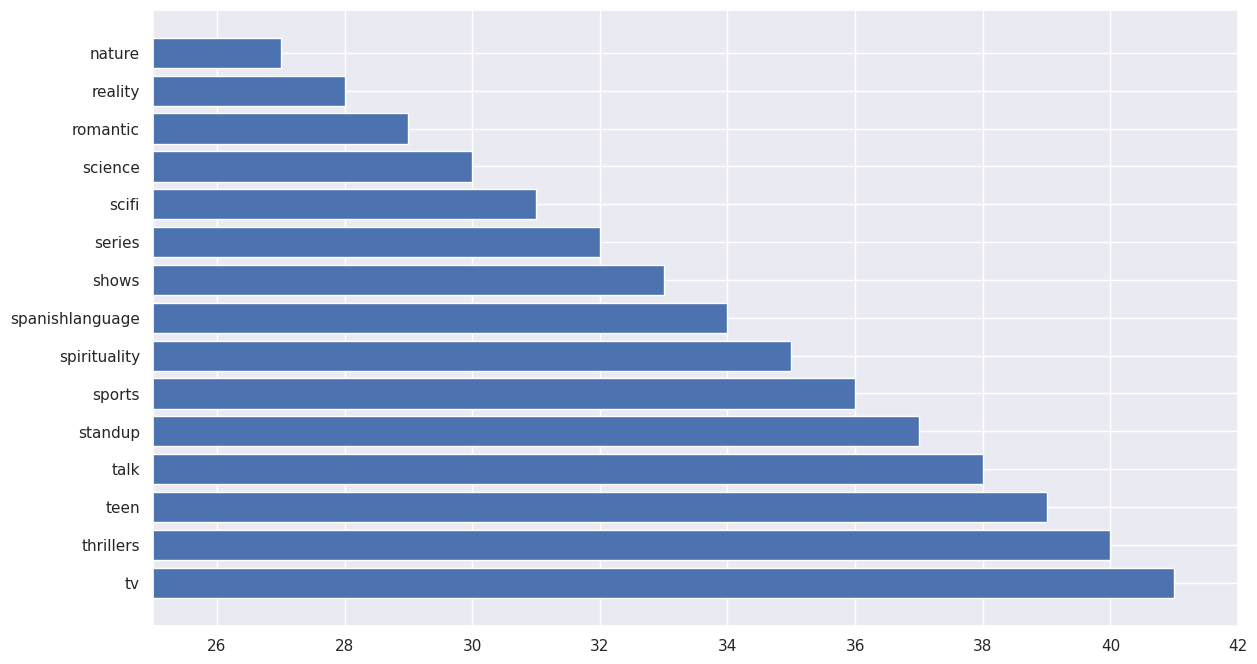

In [333]:
plt.figure( figsize = ( 14,8 ))
plt.xlim(25, 42 )
plt.barh(top15_most_ocurred_words_listed_in , top15_most_occurred_words_in_listed_in_count )

### Now will use SnowballStemmer

In [335]:
#Stemming for description
data['listed_in'] = data['listed_in'].apply( Apply_stemming )
data.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month,Length(description)
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,1100,intern tv show tv drama tv scifi fantasi,futur elit inhabit island paradis far crowd sl...,3,August,82
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93,drama intern movi,devast earthquak hit mexico citi trap survivor...,2,December,88
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78,horror movi intern movi,armi recruit found dead fellow soldier forc co...,2,December,102
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80,action adventur independ movi scifi fantasi,postapocalypt world ragdol robot hide fear dan...,3,November,89
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123,drama,brilliant group student becom cardcount expert...,1,January,99


### Now will use TfidfVectorizer

In [336]:
# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# Fit the vectorizer using the text data
tfid_vectorizer.fit(data['listed_in'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [337]:
dictionary

dict_items([('intern', 18), ('tv', 39), ('show', 31), ('drama', 11), ('scifi', 29), ('fantasi', 14), ('movi', 22), ('horror', 16), ('action', 0), ('adventur', 1), ('independ', 17), ('mysteri', 24), ('thriller', 38), ('crime', 7), ('docuseri', 10), ('documentari', 9), ('sport', 34), ('comedi', 6), ('anim', 2), ('seri', 30), ('realiti', 26), ('romant', 27), ('scienc', 28), ('natur', 25), ('british', 3), ('korean', 20), ('music', 23), ('lgbtq', 21), ('faith', 12), ('spiritu', 33), ('kid', 19), ('spanishlanguag', 32), ('children', 4), ('famili', 13), ('classic', 5), ('cult', 8), ('standup', 35), ('talk', 36), ('teen', 37), ('featur', 15)])

In [338]:
# Lists to store the vocab and counts
vocab = []
count_of_vocab = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count_of_vocab.append(value)

### Creating a new DataFrame vocab_after_stemming_listed_in

In [339]:
vocab_after_stemming_listed_in = pd.DataFrame({"Word": vocab , "count" :count_of_vocab})
# Sort the dataframe by count
vocab_after_stemming_listed_in = vocab_after_stemming_listed_in.sort_values("count" ,ascending=False)

In [340]:
top15_most_ocurred_vocab_lised_in_after_stem = vocab_after_stemming_listed_in.head(15)

In [341]:
top15_most_ocurred_vocab_lised_in_after_stem_word = top15_most_ocurred_vocab_lised_in_after_stem.Word.values
top15_most_ocurred_vocab_lised_in_after_stem_word

array(['tv', 'thriller', 'teen', 'talk', 'standup', 'sport', 'spiritu',
       'spanishlanguag', 'show', 'seri', 'scifi', 'scienc', 'romant',
       'realiti', 'natur'], dtype=object)

In [342]:
top15_most_occurred_words_listed_in_count = top15_most_ocurred_vocab_lised_in_after_stem['count'].values
top15_most_occurred_words_listed_in_count

array([39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25])

### Plot of the top vocab present in listed_in (after stemming)

<BarContainer object of 15 artists>

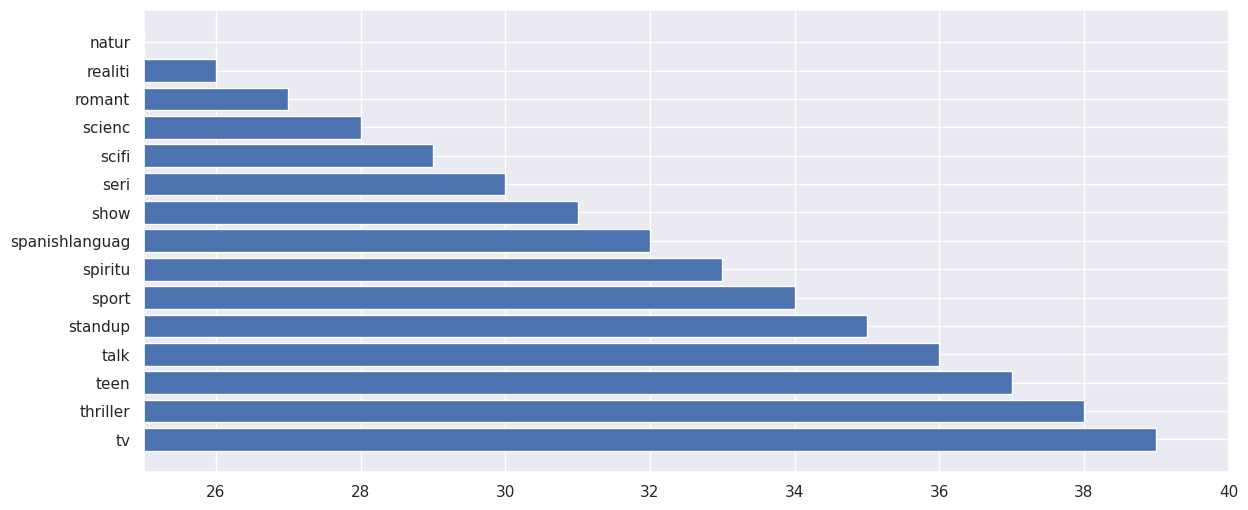

In [345]:
plt.figure( figsize = ( 14,6 ))
plt.xlim(25, 40 )
plt.barh(top15_most_ocurred_vocab_lised_in_after_stem_word , top15_most_occurred_words_listed_in_count )

### Adding a new column length( listed-in ) which will contain length of listed_in

In [346]:
data['Length(listed-in)'] = data['listed_in'].apply(lambda x: len(x))
data.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month,Length(description),Length(listed-in)
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,1100,intern tv show tv drama tv scifi fantasi,futur elit inhabit island paradis far crowd sl...,3,August,82,40
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93,drama intern movi,devast earthquak hit mexico citi trap survivor...,2,December,88,17
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78,horror movi intern movi,armi recruit found dead fellow soldier forc co...,2,December,102,23
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80,action adventur independ movi scifi fantasi,postapocalypt world ragdol robot hide fear dan...,3,November,89,43
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123,drama,brilliant group student becom cardcount expert...,1,January,99,5


In [347]:
data.columns

Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'no_of_category', 'date_added_month', 'Length(description)',
       'Length(listed-in)'],
      dtype='object')

In [349]:
data[['description', 'Length(description)', 'listed_in' ,'Length(listed-in)' ]].head()

,description,Length(description),listed_in,Length(listed-in)
0,futur elit inhabit island paradis far crowd sl...,82,intern tv show tv drama tv scifi fantasi,40
1,devast earthquak hit mexico citi trap survivor...,88,drama intern movi,17
2,armi recruit found dead fellow soldier forc co...,102,horror movi intern movi,23
3,postapocalypt world ragdol robot hide fear dan...,89,action adventur independ movi scifi fantasi,43
4,brilliant group student becom cardcount expert...,99,drama,5


# 5. Applying Clustering Algorithms

## Clustering: -
Clustering can be considered the most important unsupervised learning problem; so, as every other problem of this kind, it deals with finding a structure in a collection of unlabeled data.A loose definition of clustering could be “the process of organizing objects into groups whose members are similar in some way”.A cluster is therefore a collection of objects which are “similar” between them and are “dissimilar” to the objects belonging to other clusters.

## 1. Silhouette score

In [350]:
data.columns

Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'no_of_category', 'date_added_month', 'Length(description)',
       'Length(listed-in)'],
      dtype='object')

In [351]:
X_features_rec = data[['no_of_category' ,'Length(description)','Length(listed-in)']]
stdscaler = preprocessing.StandardScaler()

In [352]:
X_features_rec.describe()

,no_of_category,Length(description),Length(listed-in)
count,7770.000000,7770.000000,7770.000000
mean,2.193308,93.012484,24.342085
std,0.785836,10.775430,10.677661
min,1.000000,25.000000,4.000000
25%,2.000000,87.000000,17.000000
50%,2.000000,93.000000,24.000000
75%,3.000000,100.000000,32.000000
max,3.000000,185.000000,62.000000


In [353]:
X_rescale=stdscaler.fit_transform(X_features_rec)
X=X_rescale
silhouette_score_ = [  ]
range_n_clusters = [i for i in range(2,16)]

In [354]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    silhouette_score_.append([int(n_clusters) , round(score , 3)])
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.42843328899854627
For n_clusters = 3, silhouette score is 0.3832991558393045
For n_clusters = 4, silhouette score is 0.37431547662296216
For n_clusters = 5, silhouette score is 0.3714807932204481
For n_clusters = 6, silhouette score is 0.37974857230446685
For n_clusters = 7, silhouette score is 0.35491132383428803
For n_clusters = 8, silhouette score is 0.3707733418425295
For n_clusters = 9, silhouette score is 0.374736214700284
For n_clusters = 10, silhouette score is 0.3656402876190531
For n_clusters = 11, silhouette score is 0.3562462953964245
For n_clusters = 12, silhouette score is 0.35066025829661057
For n_clusters = 13, silhouette score is 0.3516448210020425
For n_clusters = 14, silhouette score is 0.3363146953198163
For n_clusters = 15, silhouette score is 0.34503910289789713


In [355]:
temp = pd.DataFrame(silhouette_score_ , columns = ["n clusters" , "silhouette score"])
temp = temp.sort_values( "silhouette score" , ascending = False )
temp.head(15)

,n clusters,silhouette score
0,2,0.428
1,3,0.383
4,6,0.380
7,9,0.375
2,4,0.374
3,5,0.371
6,8,0.371
8,10,0.366
9,11,0.356
5,7,0.355


### NOTE :-
The value of the silhouette coefﬁcient is between [-1, 1]. A score of 1 denotes the best meaning that the data point (i) is very compact within the cluster to which it belongs and far away from the other clusters. The worst value is -1. Values near 0 denote overlapping clusters

For n_clusters = 2 The average silhouette_score is : 0.42843328899854627
For n_clusters = 3 The average silhouette_score is : 0.3832991558393045
For n_clusters = 4 The average silhouette_score is : 0.37431547662296216
For n_clusters = 5 The average silhouette_score is : 0.3720843918336816
For n_clusters = 6 The average silhouette_score is : 0.3683935727757619
For n_clusters = 7 The average silhouette_score is : 0.3759188611985892
For n_clusters = 8 The average silhouette_score is : 0.3529435800136665
For n_clusters = 9 The average silhouette_score is : 0.37382907822095707
For n_clusters = 10 The average silhouette_score is : 0.36466585189849926
For n_clusters = 11 The average silhouette_score is : 0.3556771542933465
For n_clusters = 12 The average silhouette_score is : 0.354922889695617
For n_clusters = 13 The average silhouette_score is : 0.3510103258811644
For n_clusters = 14 The average silhouette_score is : 0.33708015977518657
For n_clusters = 15 The average silhouette_score is : 0

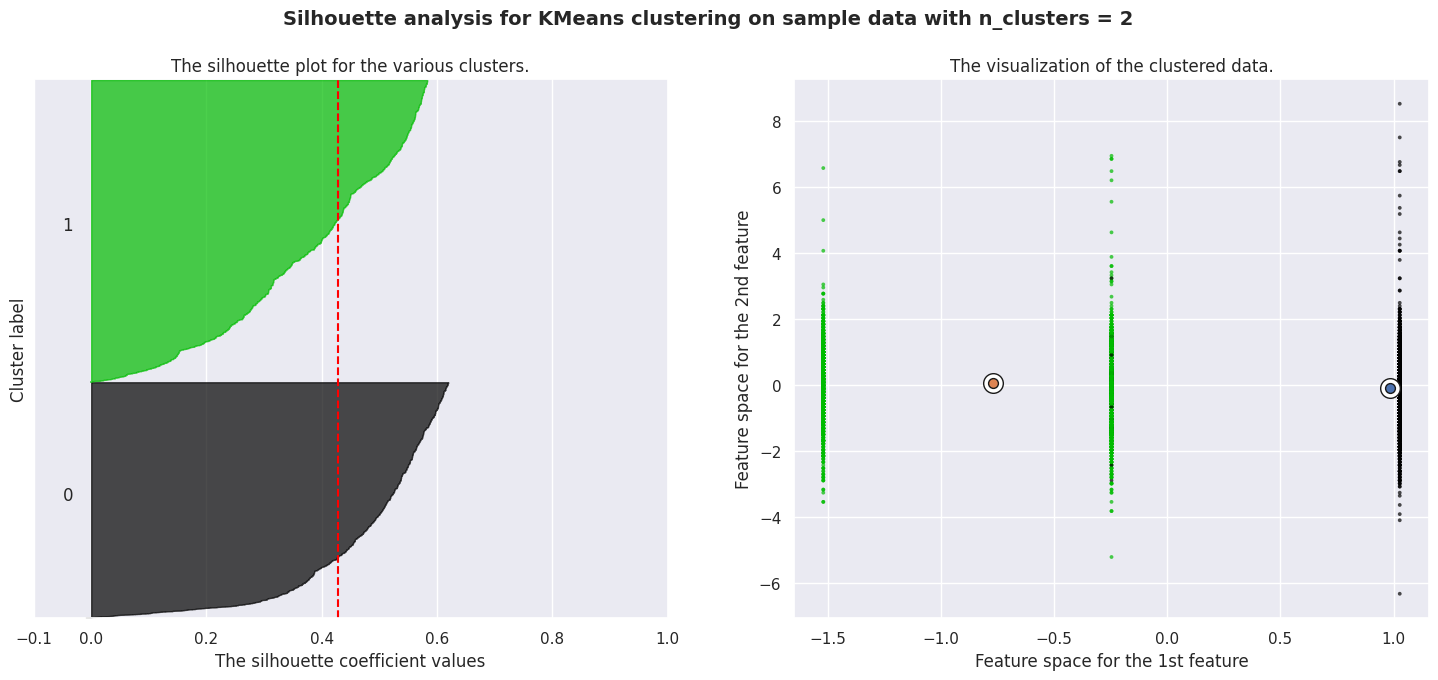

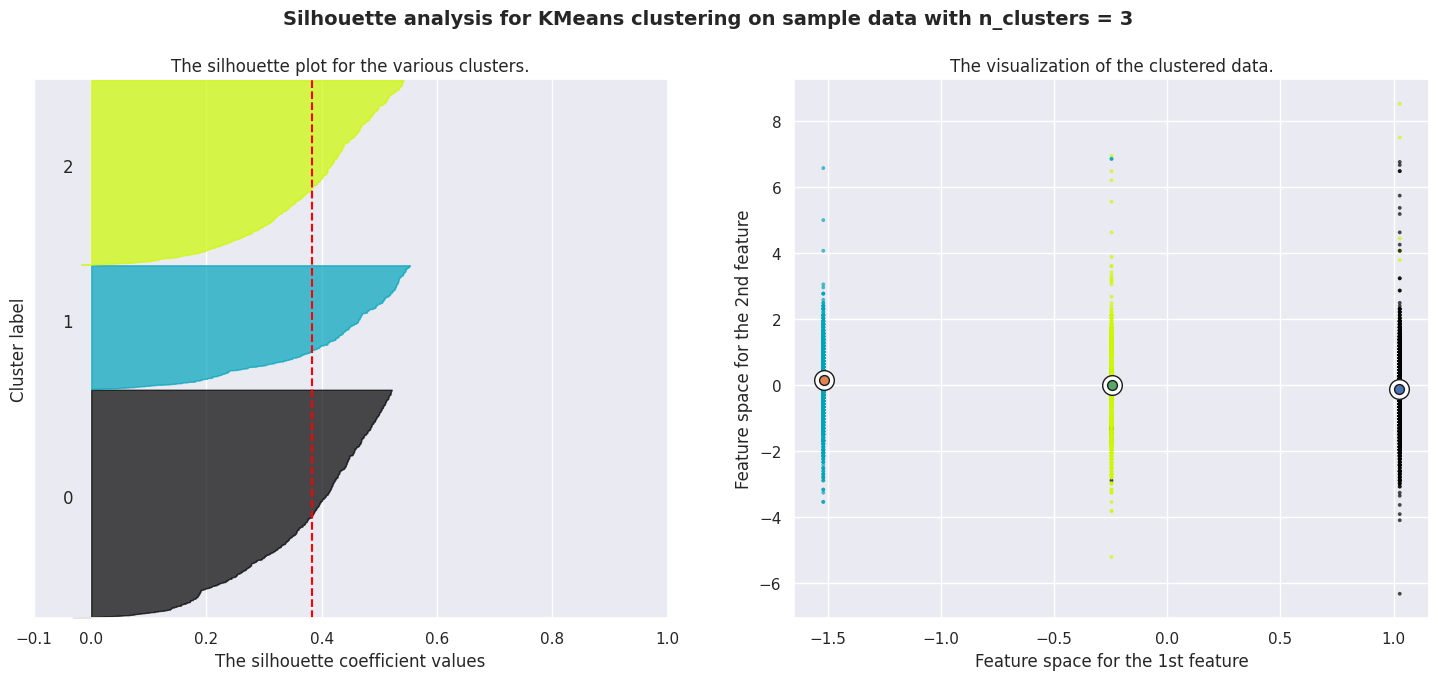

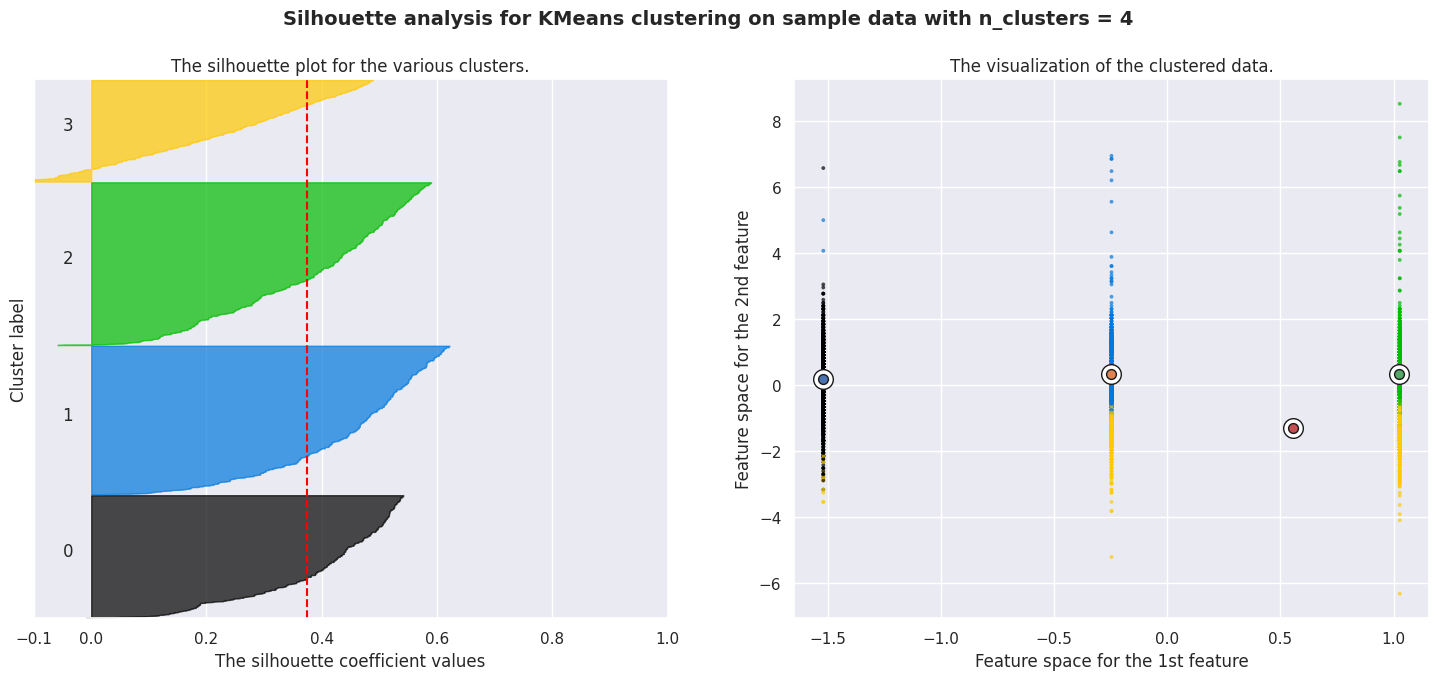

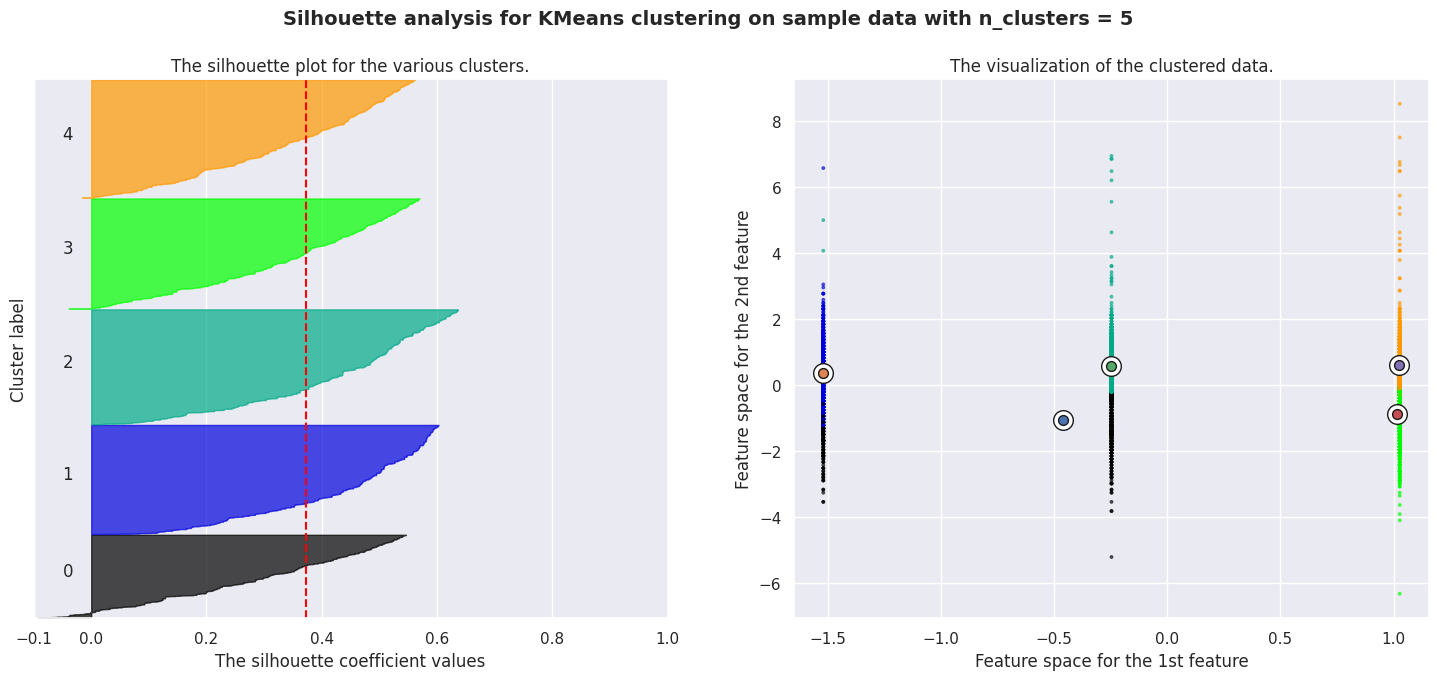

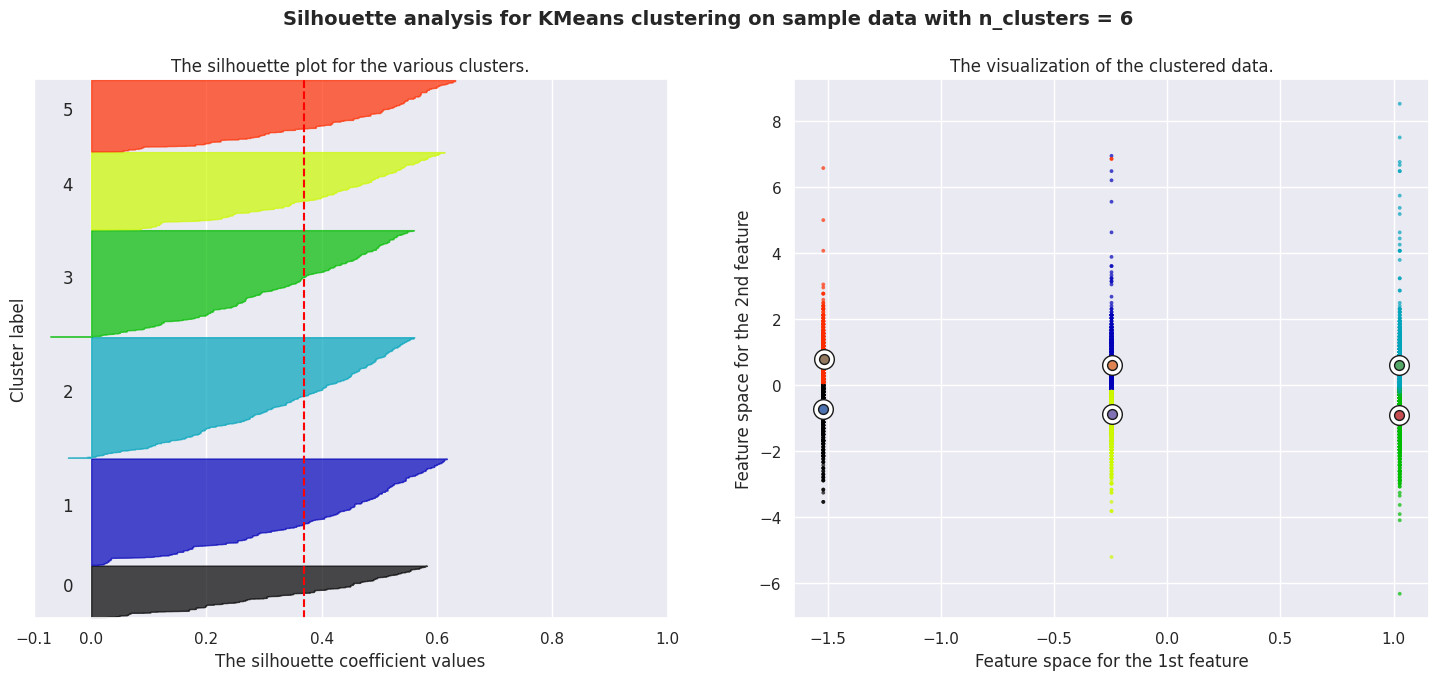

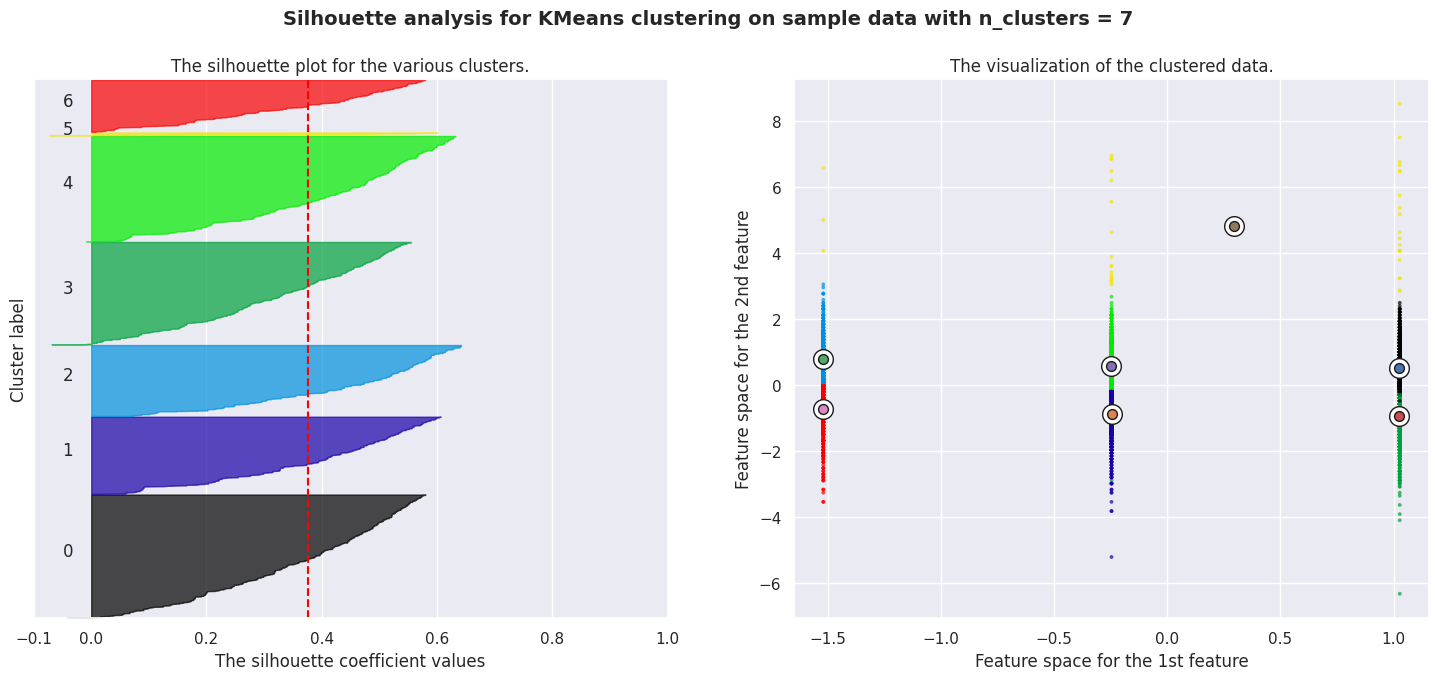

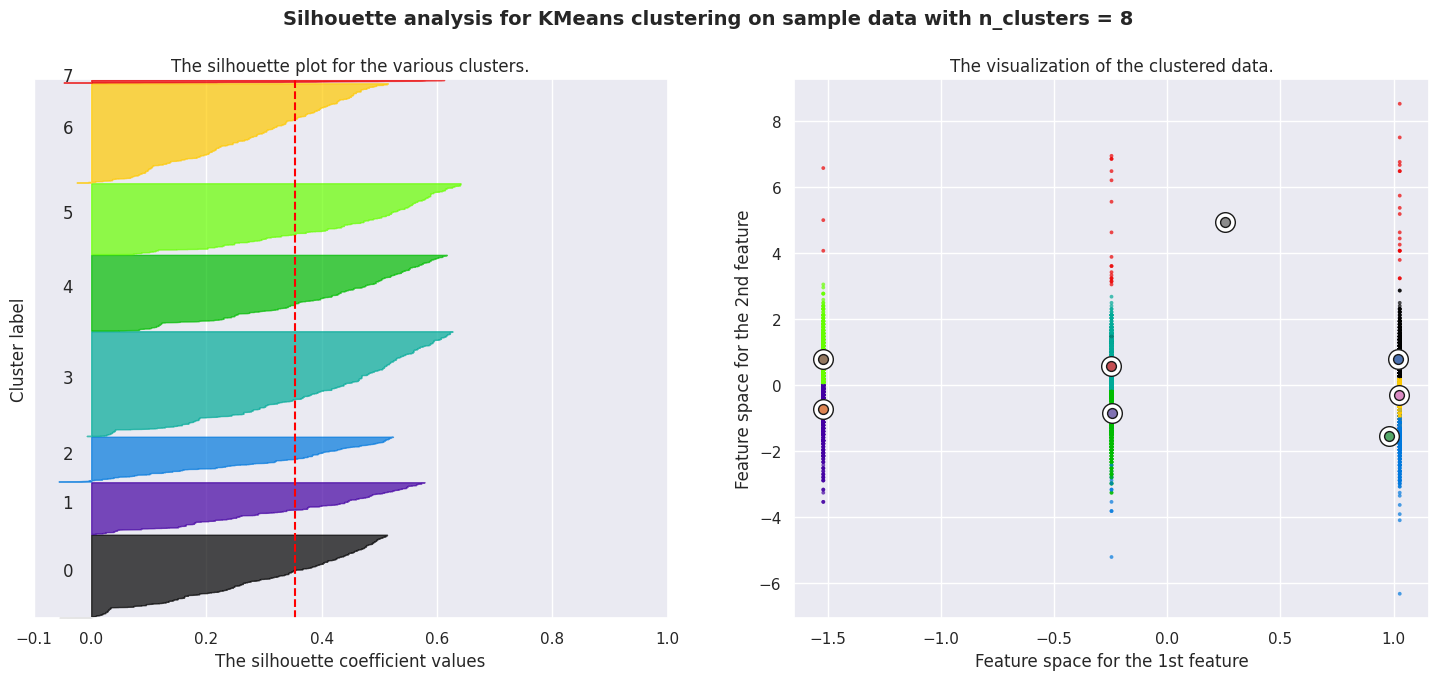

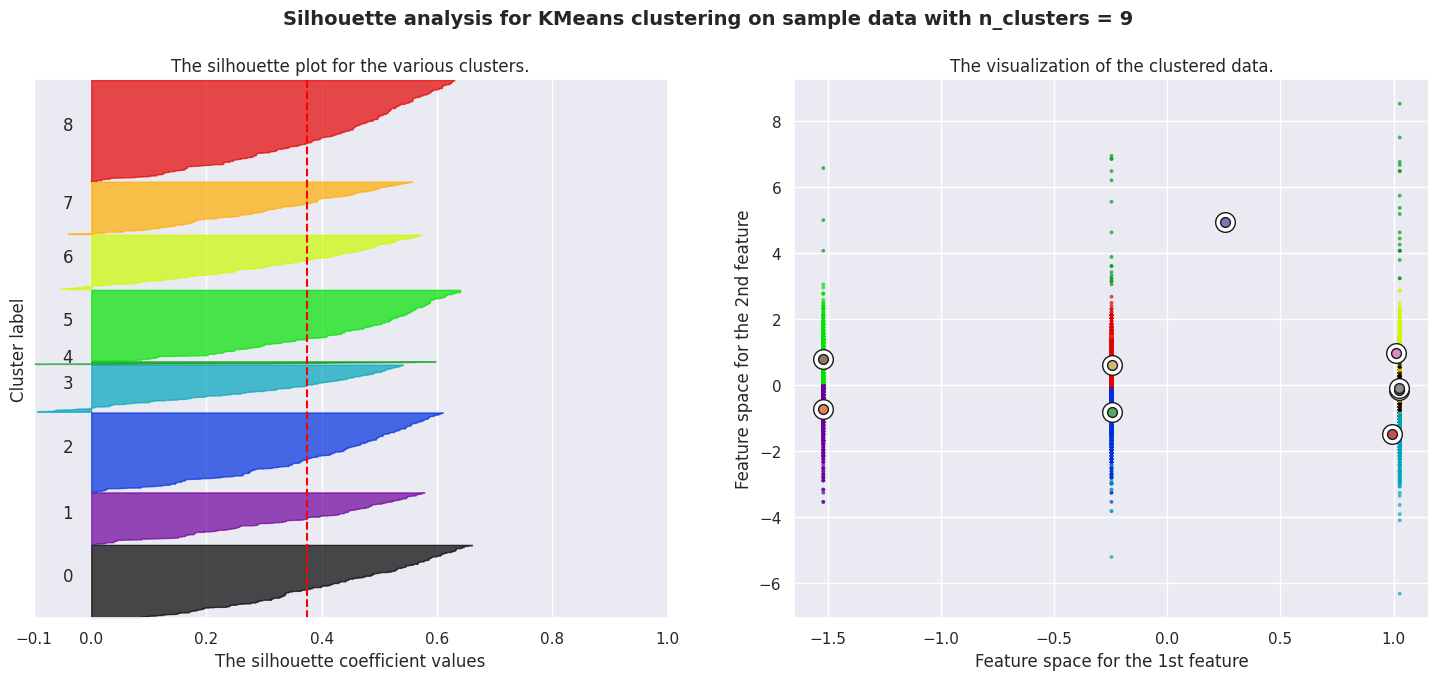

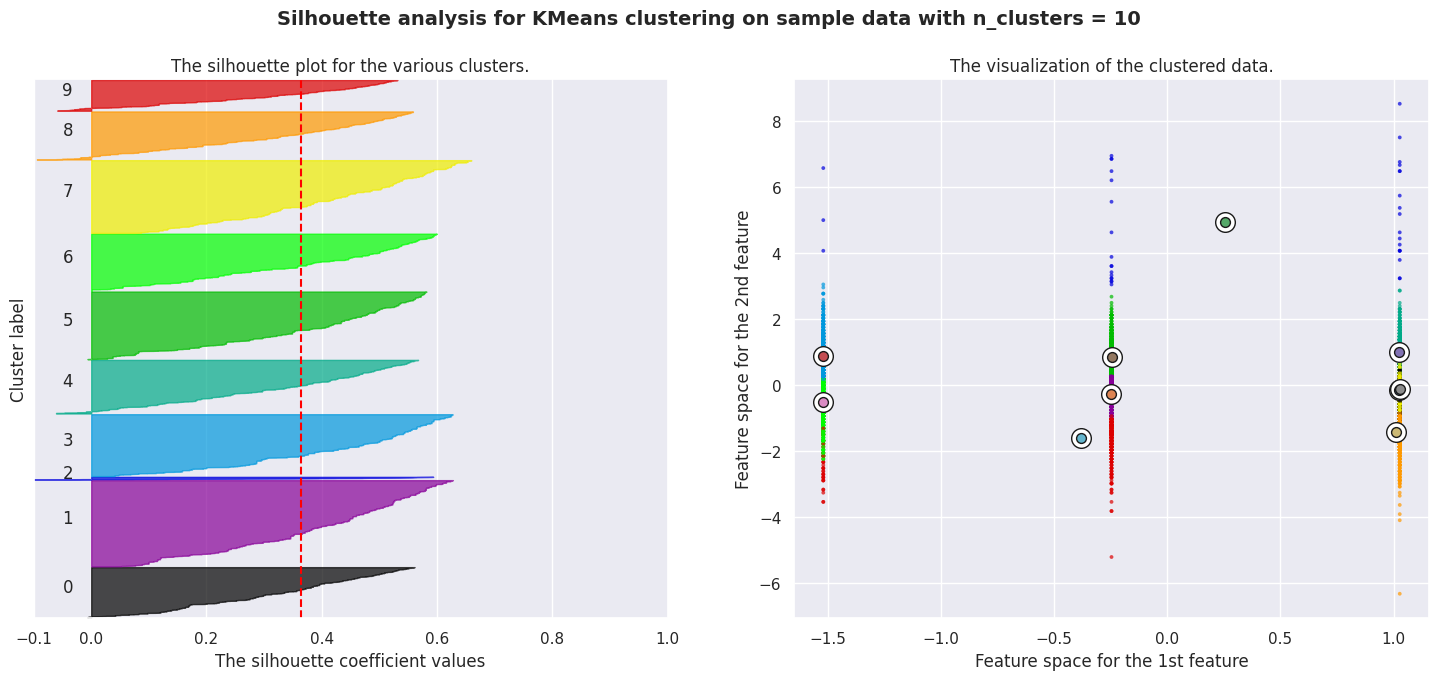

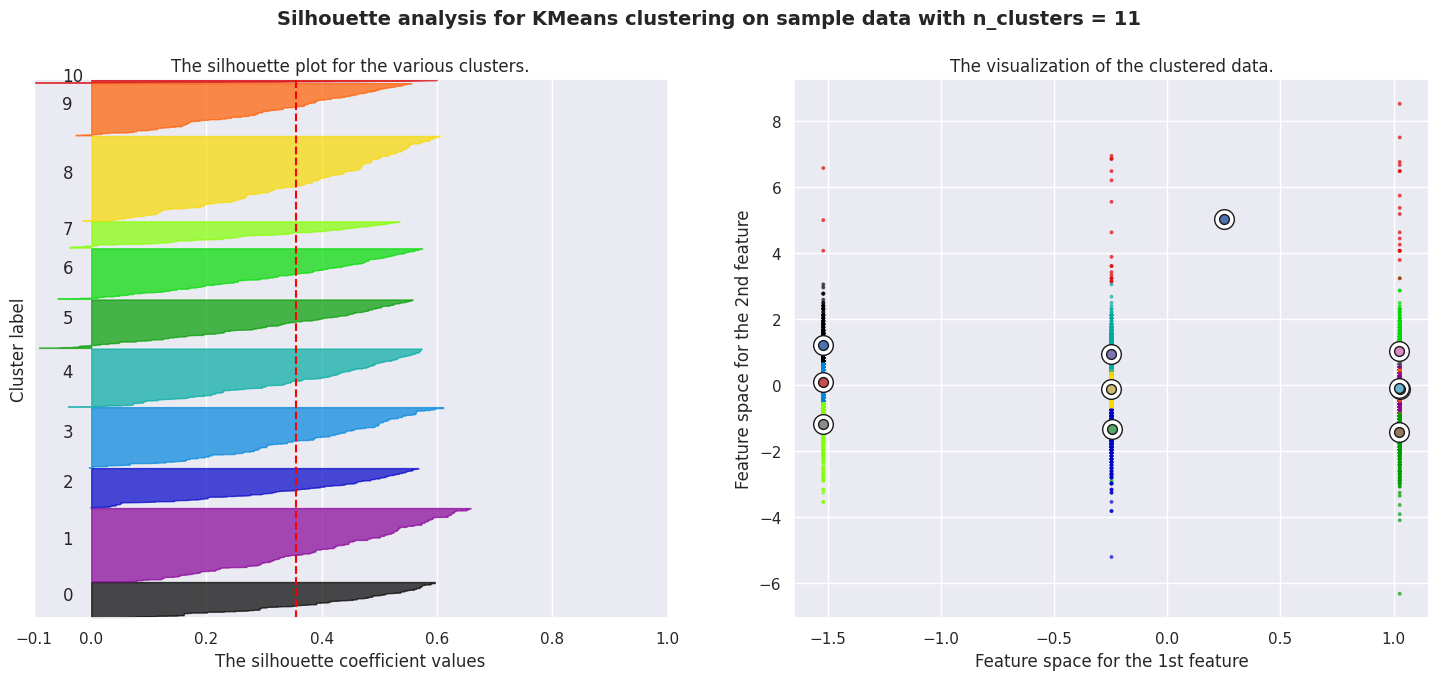

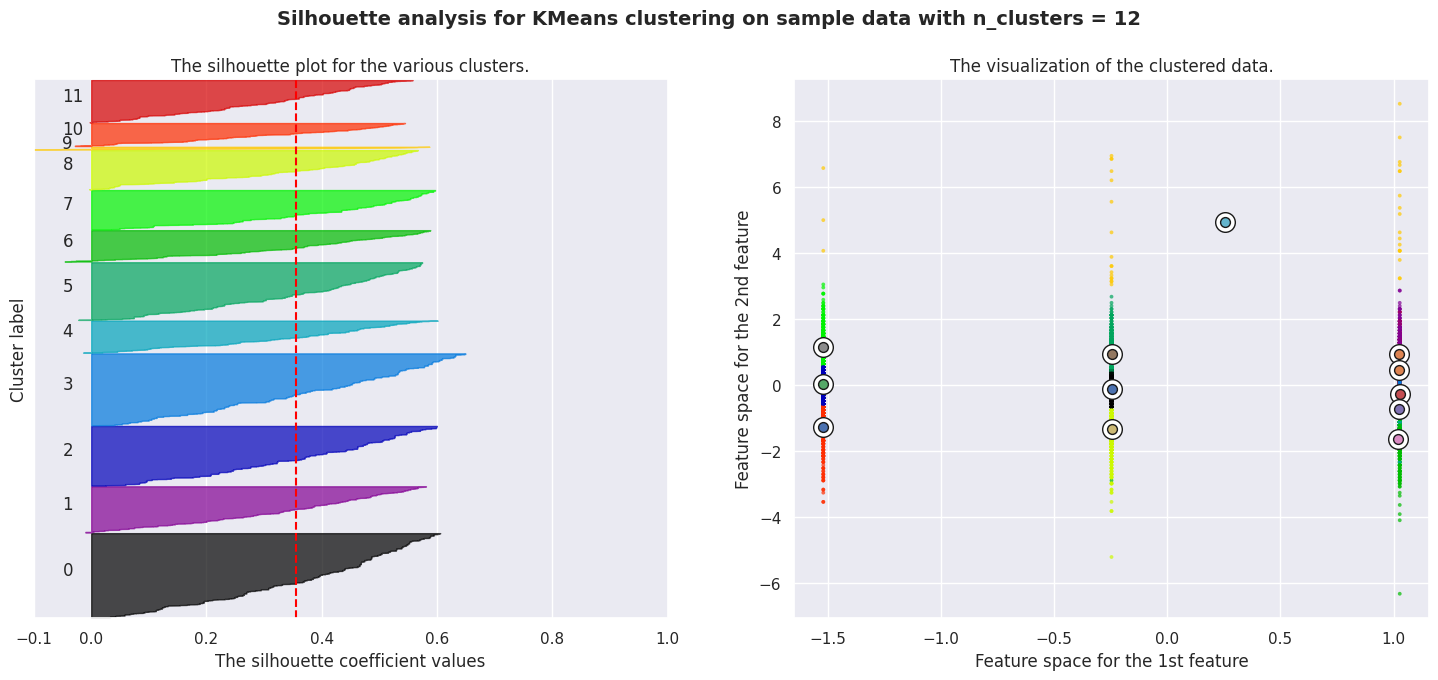

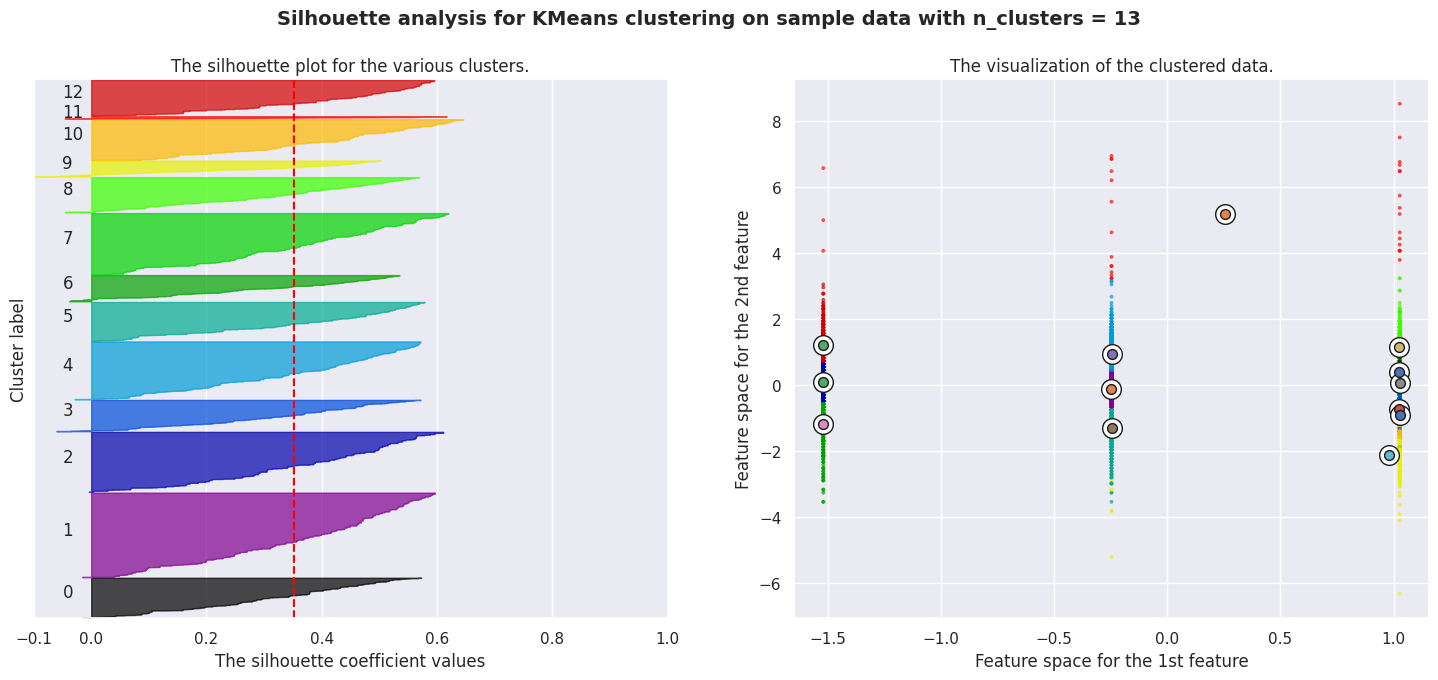

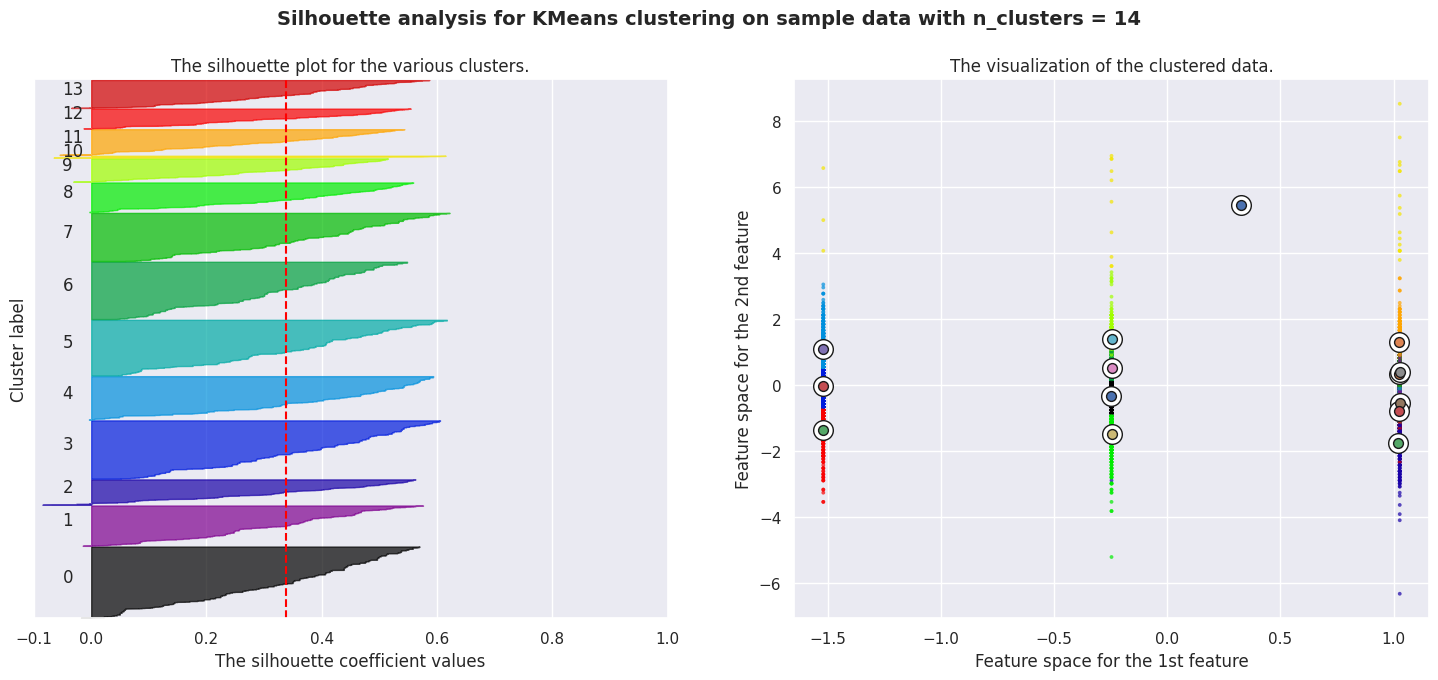

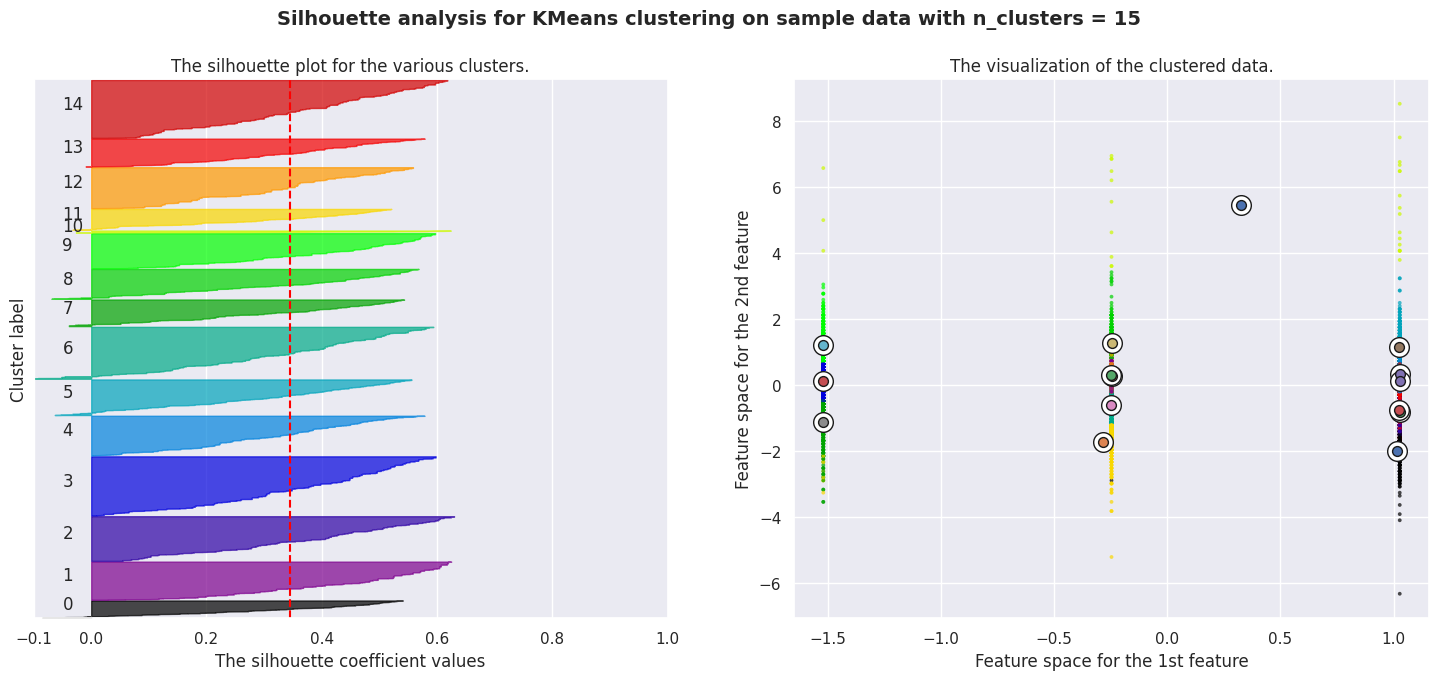

In [357]:
range_n_clusters = [i for i in range(2,16)]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker='o', alpha=1, s=50, edgecolor='k')


    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. To calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters:

* Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a.

* Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b.

## 2. Elbow Method

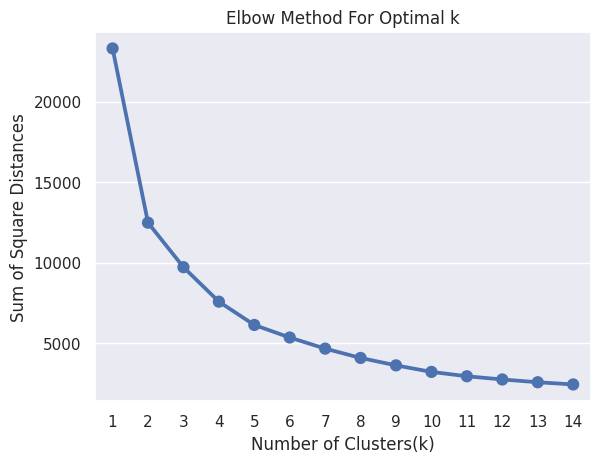

In [358]:
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_

#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#### Now we will be using 3 clusters

In [359]:
kmeans = KMeans(n_clusters = 3 )
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

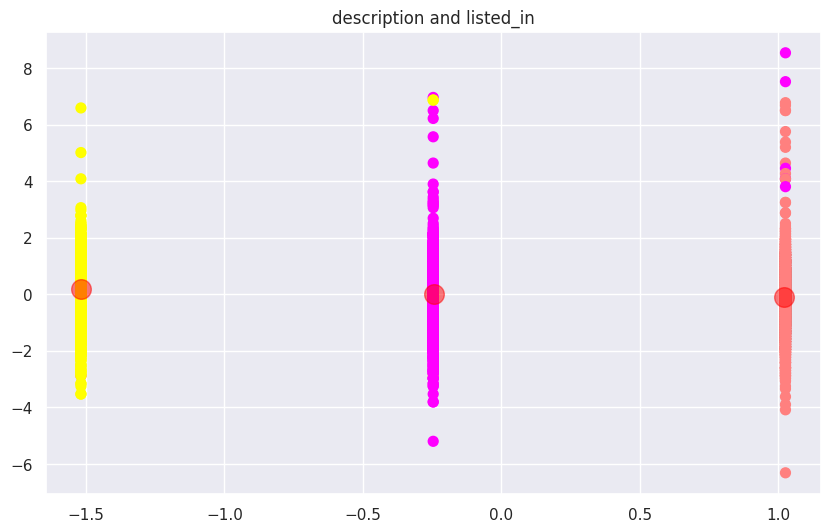

In [360]:
plt.figure(figsize=(10 , 6))
plt.title('description and listed_in')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

## 3. DBSCAN

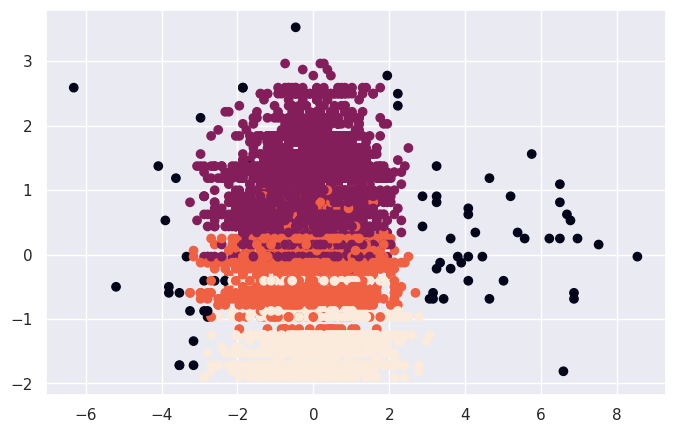

In [365]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=( 8 , 5 ))
plt.scatter(X[:,1], X[:,2], c=y_pred)

### Observations

1. The Black dots are noise

## 4. Dendrogram

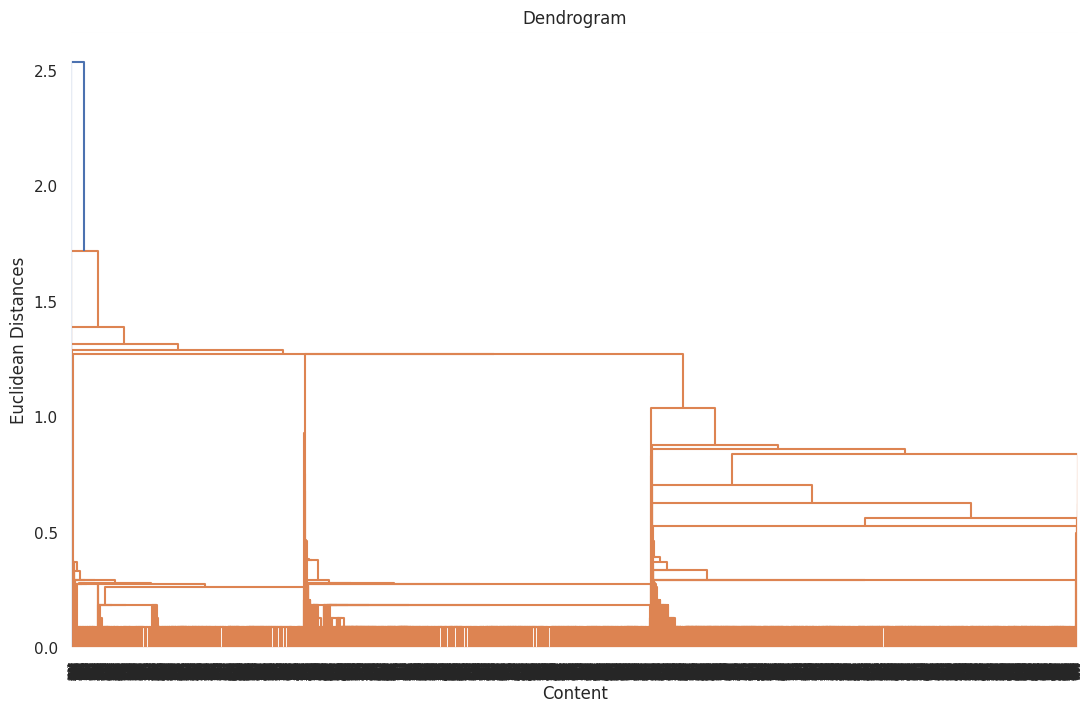

In [364]:
# Let's import sch
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'single'))
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

## 5. AgglomerativeClustering

In [366]:
# Let's  import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

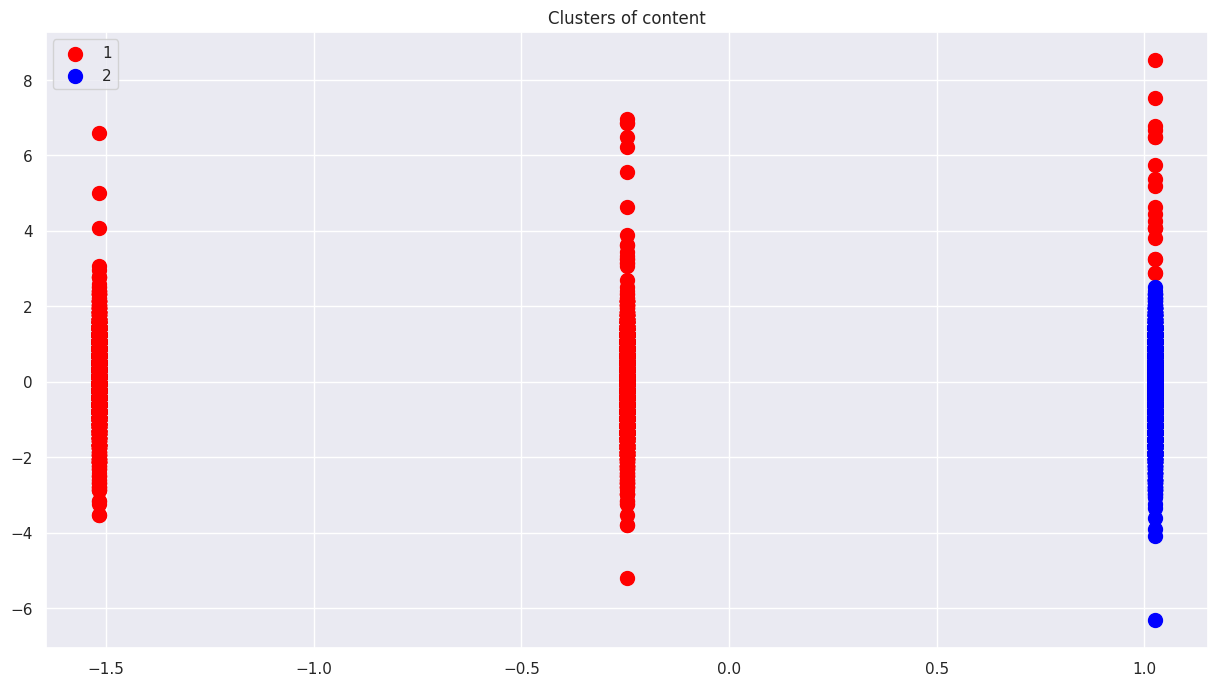

In [367]:
# Visualizing the clusters (three dimensions only)
plt.figure(figsize=(15,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = '1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = '2')
# plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = '3')

plt.title('Clusters of content')

plt.legend()
plt.show()

# 6. Conclusion


1. Director and cast contained a large number of null values so we dropped these 2 columns.

2. In this dataset there are two types of contents where 30.86% includes TV shows and the
remaining 69.14% carries Movies.

3. We have reached a conclusion from our analysis from the content added over years that Netflix is focusing movies and TV shows (Fom 2016 data we get to know that Movies is increased by 80% and TV shows is increased by 73% compare)

4. From the dataset insights we can conclude that the most number of TV Shows released in 2017 and for Movies it is 2020.

5. On Netflix USA has the largest number of contents. And most of the countries preferred to produce movies more than TV shows.

6. Most of the movies are belonging to 3 categories.

7. TOP 3 content categories are International movies , dramas , comedies.

8. In text analysis (NLP) I used stop words, removed punctuations , stemming & TF-IDF vectorizer and other functions of NLP.

9. Applied different clustering models like Kmeans, hierarchical, Agglomerative clustering, DBSCAN on data we got the best cluster arrangements.

10. By applying different clustering algorithms to our dataset we get the optimal number of cluster i.e. 3

## Futue Work


From this clustering analysis we can create Netflix movies and tv shows recommendation system & also we can use topic modeling.